In [1]:
# Import Libraries
#System
import os 

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [2]:
# Questions

# After a deeply exploration and once we have understand the dataset

# 1. Analisis the white_rating and black_rating over the time, we have seen that the top players using blacks aren't 
# the top players using whites.

# 2. Analise the opening_name value to know which opening has the highest rate of victory with whites and which one with blacks 

# 3. Logical regression --> Explain the probability of the target 'winner' (binary) of been 'white' or 'black' 
# using as a predictor a variable 'opening_ply', 'turns' or ratings

# Standarizing Visualizations

In [3]:
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
set_sns_format(width=14, height=8)

In [4]:
# Adding  datapoints values to line or bar plots

def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)

# Dataset Discovery

In [5]:
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\LABS\Mini-Proyect\Chess_aa_is')
df = pd.read_csv('games.csv')

In [6]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


# Exploration of Data

In [7]:
df.describe() #numerical statistics description

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [8]:
df.describe(include = object) # Categorical statistics description

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
count,20058,20058,20058,20058,20058,20058,20058,20058,20058
unique,19113,4,3,400,9438,9331,18920,365,1477
top,XRuQPSzH,resign,white,10+0,taranga,taranga,e4 e5,A00,Van't Kruijs Opening
freq,5,11147,10001,7721,72,82,27,1007,368


In [9]:
df.isna().any() #There isn't NaN values

id                False
rated             False
created_at        False
last_move_at      False
turns             False
victory_status    False
winner            False
increment_code    False
white_id          False
white_rating      False
black_id          False
black_rating      False
moves             False
opening_eco       False
opening_name      False
opening_ply       False
dtype: bool

# Elimination of duplicated rows

In [10]:
# Duplicated Rows

print('Number of rows ' + str(df.shape[0]))

print('Number of duplicated rows ' + str(df.duplicated().value_counts()[1]))

#Remove duplicated in the DataFrame
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

print('Number of rows after removing duplicated rows ' + str(df.shape[0]))

Number of rows 20058
Number of duplicated rows 429
Number of rows after removing duplicated rows 19629


In [11]:
# Check Duplicated rowws by subset ()
print('Number of rows ' + str(df.shape[0]))
print('Number of rows by subset: ID, White ID, Black ID Moves and Turns ' + str(df.duplicated(subset=['id', 'white_id', 'black_id', 'moves', 'turns']).value_counts()[1]))
#Remove duplicated in the DataFrame
df.drop_duplicates(subset=['id', 'white_id', 'black_id', 'moves', 'turns'], keep='first', inplace=True, ignore_index=False)
print('Number of rows after removing duplicated rows ' + str(df.shape[0]))


Number of rows 19629
Number of rows by subset: ID, White ID, Black ID Moves and Turns 516
Number of rows after removing duplicated rows 19113


In [12]:
print(f'Number of rows removed {20058-19113}')

Number of rows removed 945


# DateTime - Convert columns Created_at & Last_move_at

In [13]:
df.head(2) #Display 2 first rows of the Dataset

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [14]:
print('Epoch timestamp: '+str(df['created_at'][2])) 

#Display the value of the Column created_at in row with index 0

Epoch timestamp: 1504130000000.0


In [15]:
print('Epoch timestamp: '+str(df['last_move_at'][2])) 

#Display the value of the Column last_move_at in row with index 0

Epoch timestamp: 1504130000000.0


In [16]:
(df['created_at'] == df['last_move_at']).value_counts() 

#Checking if the values in created_at and last_move_at are the same. 

#8533 rows have the same created_at and last_move_at as value.

False    10580
True      8533
dtype: int64

In [17]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [18]:
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [19]:
df.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


# Exploratory plots

### Rated Games

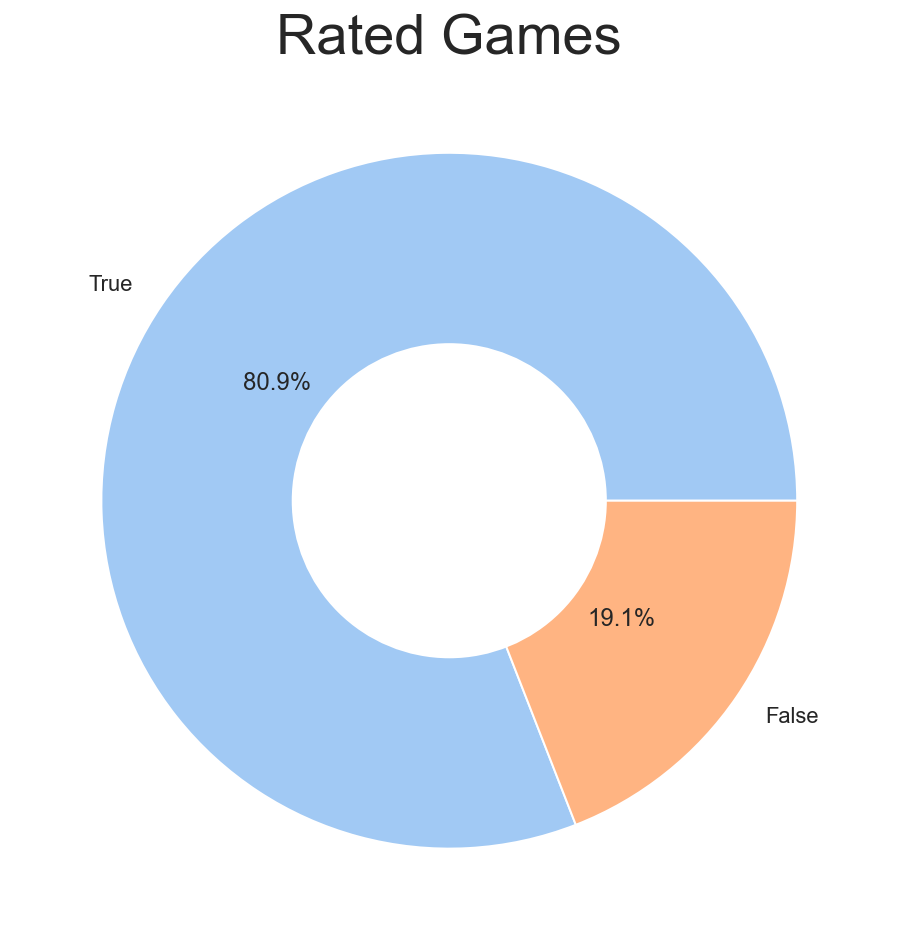

In [20]:
# create data
labels = ['True', 'False']
values = df['rated'].value_counts().to_list()
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.45, color='white')

# Give color names
plt.pie(values, labels=labels, autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Rated Games', fontsize=28)


# Show the graph

plt.show()

### Victory_Status by winner

In [21]:
df['victory_status'].value_counts()

resign       10695
mate          5974
outoftime     1598
draw           846
Name: victory_status, dtype: int64

<AxesSubplot:ylabel='victory_status'>

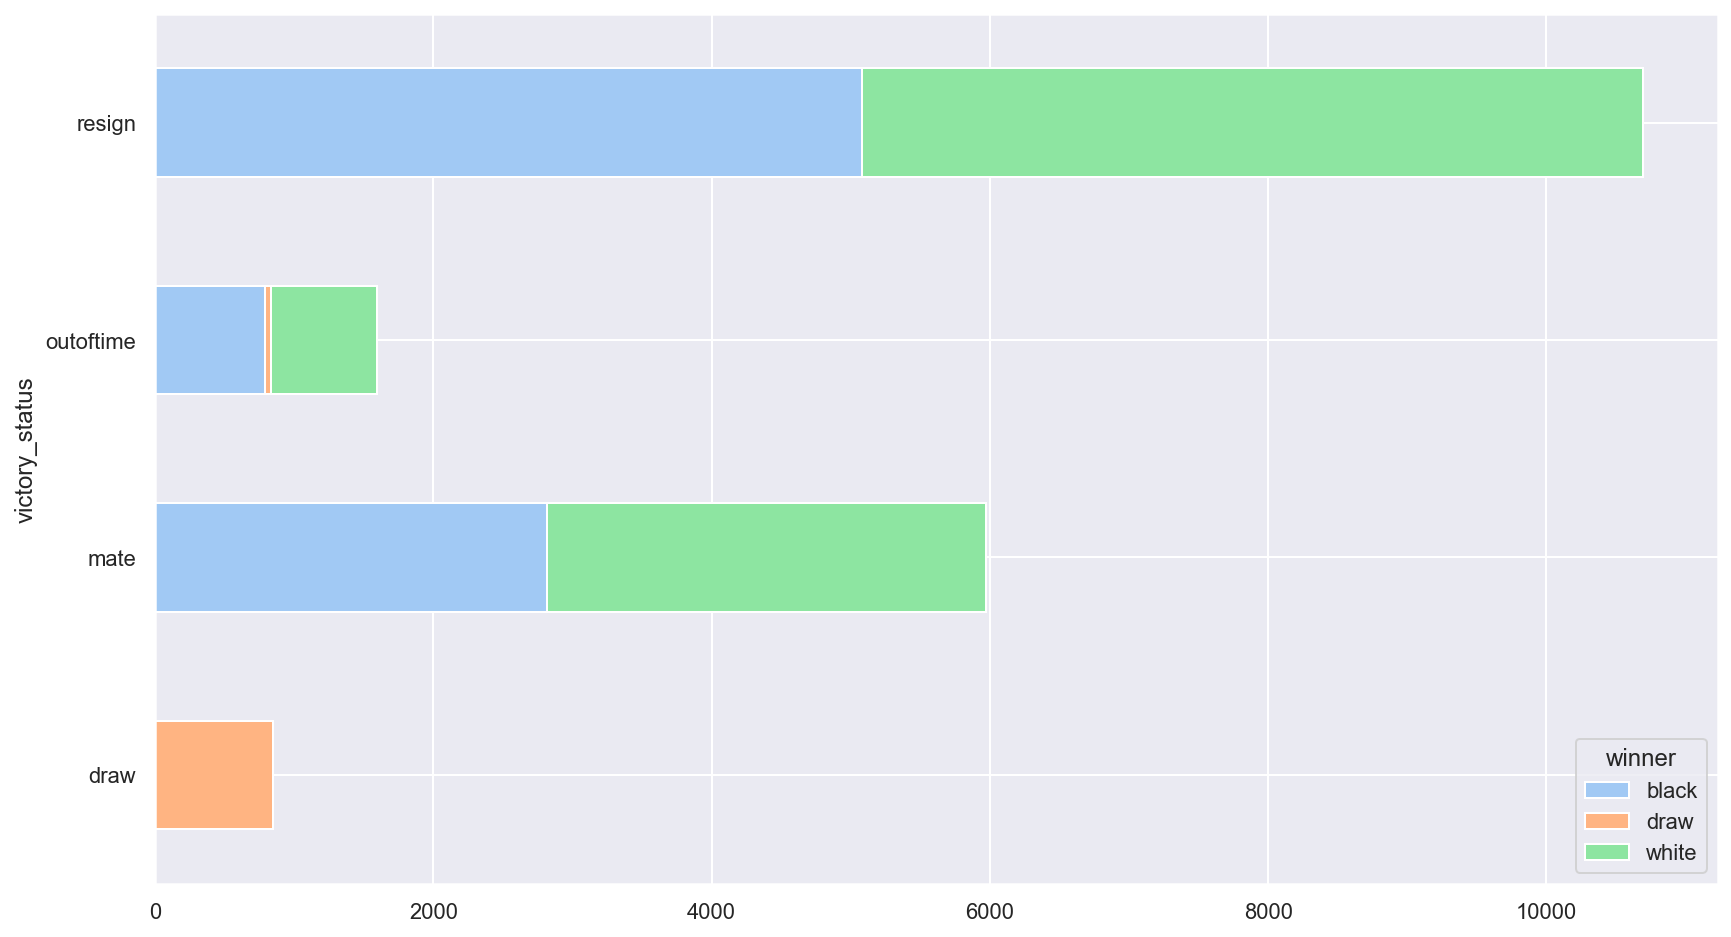

In [22]:
vict_graf = df.groupby(['victory_status', 'winner']).size().reset_index().pivot(columns='winner', index='victory_status', values=0)
vict_graf.plot(kind='barh', stacked=True)


#the victory_status depending on which is the winner

### Opening_ply by winner

<AxesSubplot:xlabel='opening_ply'>

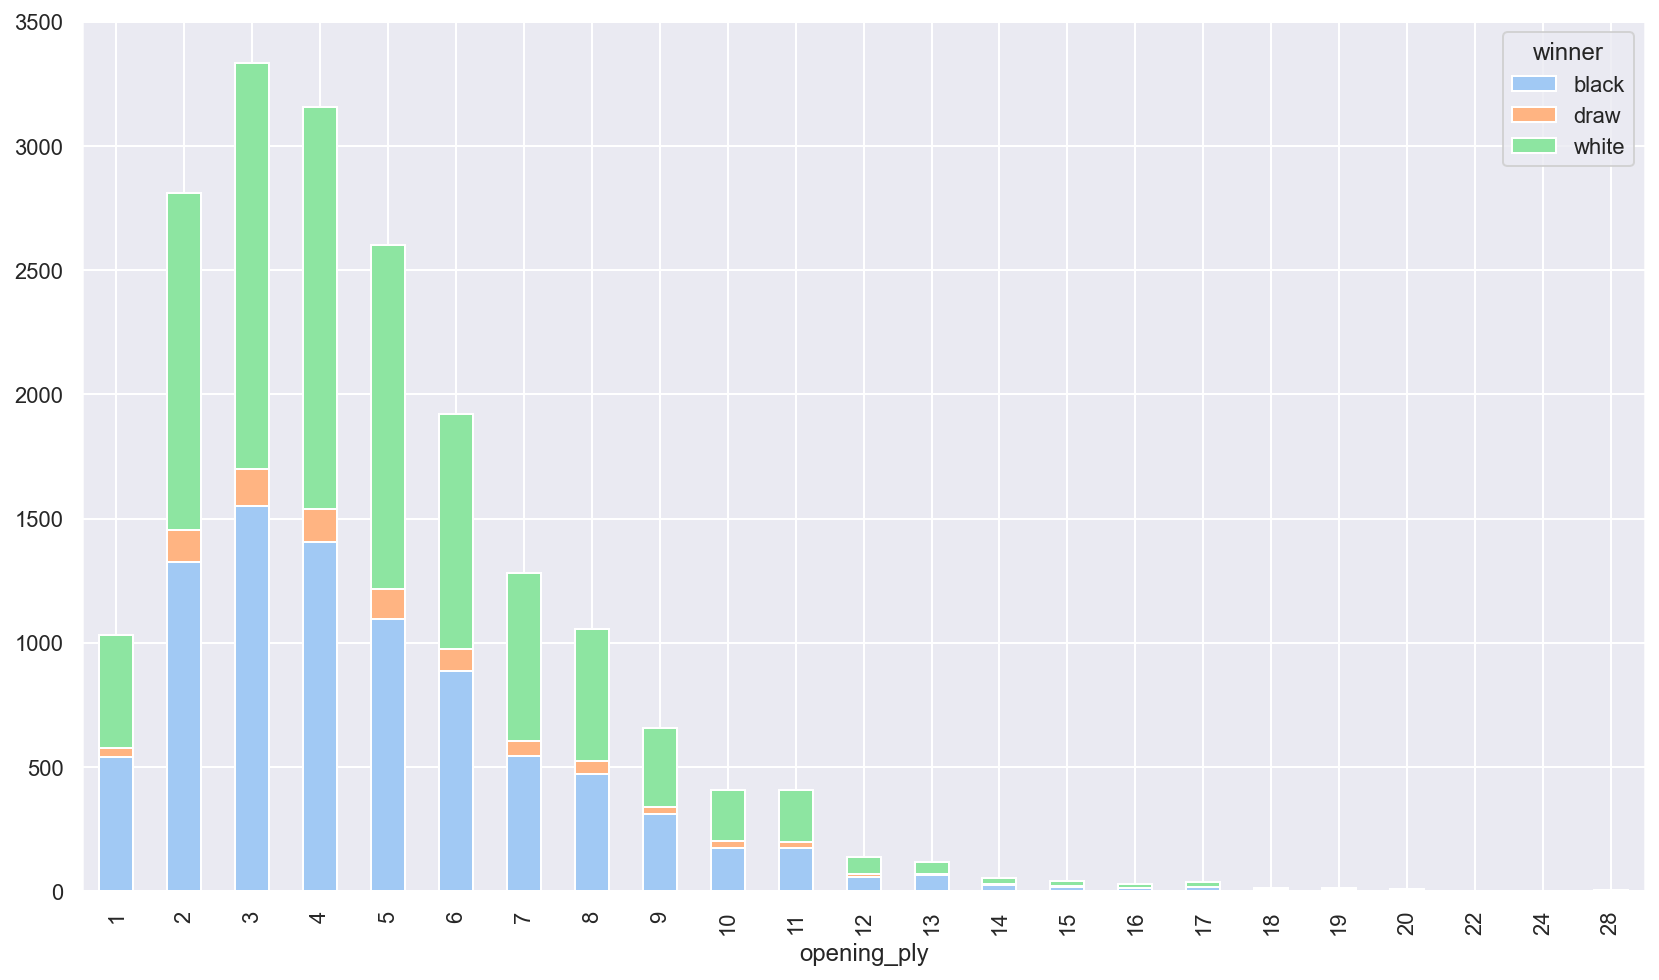

In [23]:
open_ply_graf = df.groupby(['opening_ply', 'winner']).size().reset_index().pivot(columns='winner', index='opening_ply', values=0)
open_ply_graf.plot(kind='bar', stacked=True)



#the opening_ply depending on which is the winner

### Turns by winner

<AxesSubplot:xlabel='turns'>

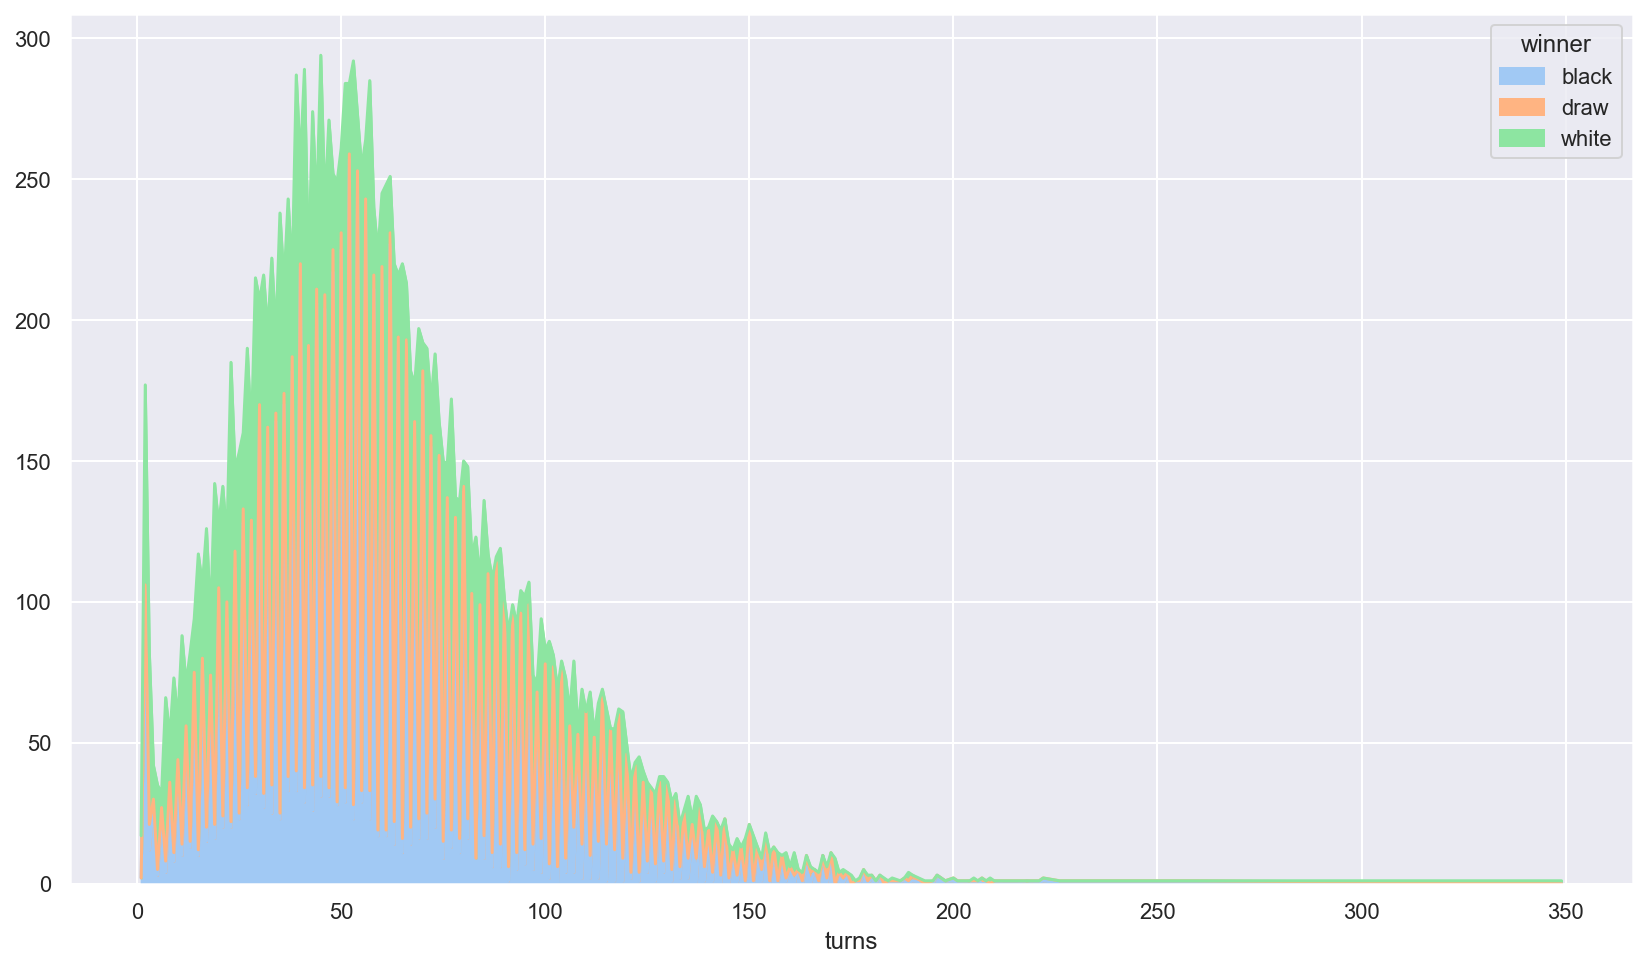

In [24]:
turns_graf = df.groupby(['turns', 'winner']).size().reset_index().pivot(columns='winner', index='turns', values=0)
turns_graf.plot(kind='area', stacked=True)


#the turns depending on which is the winner

### White_rating by winner

<AxesSubplot:xlabel='winner', ylabel='white_rating'>

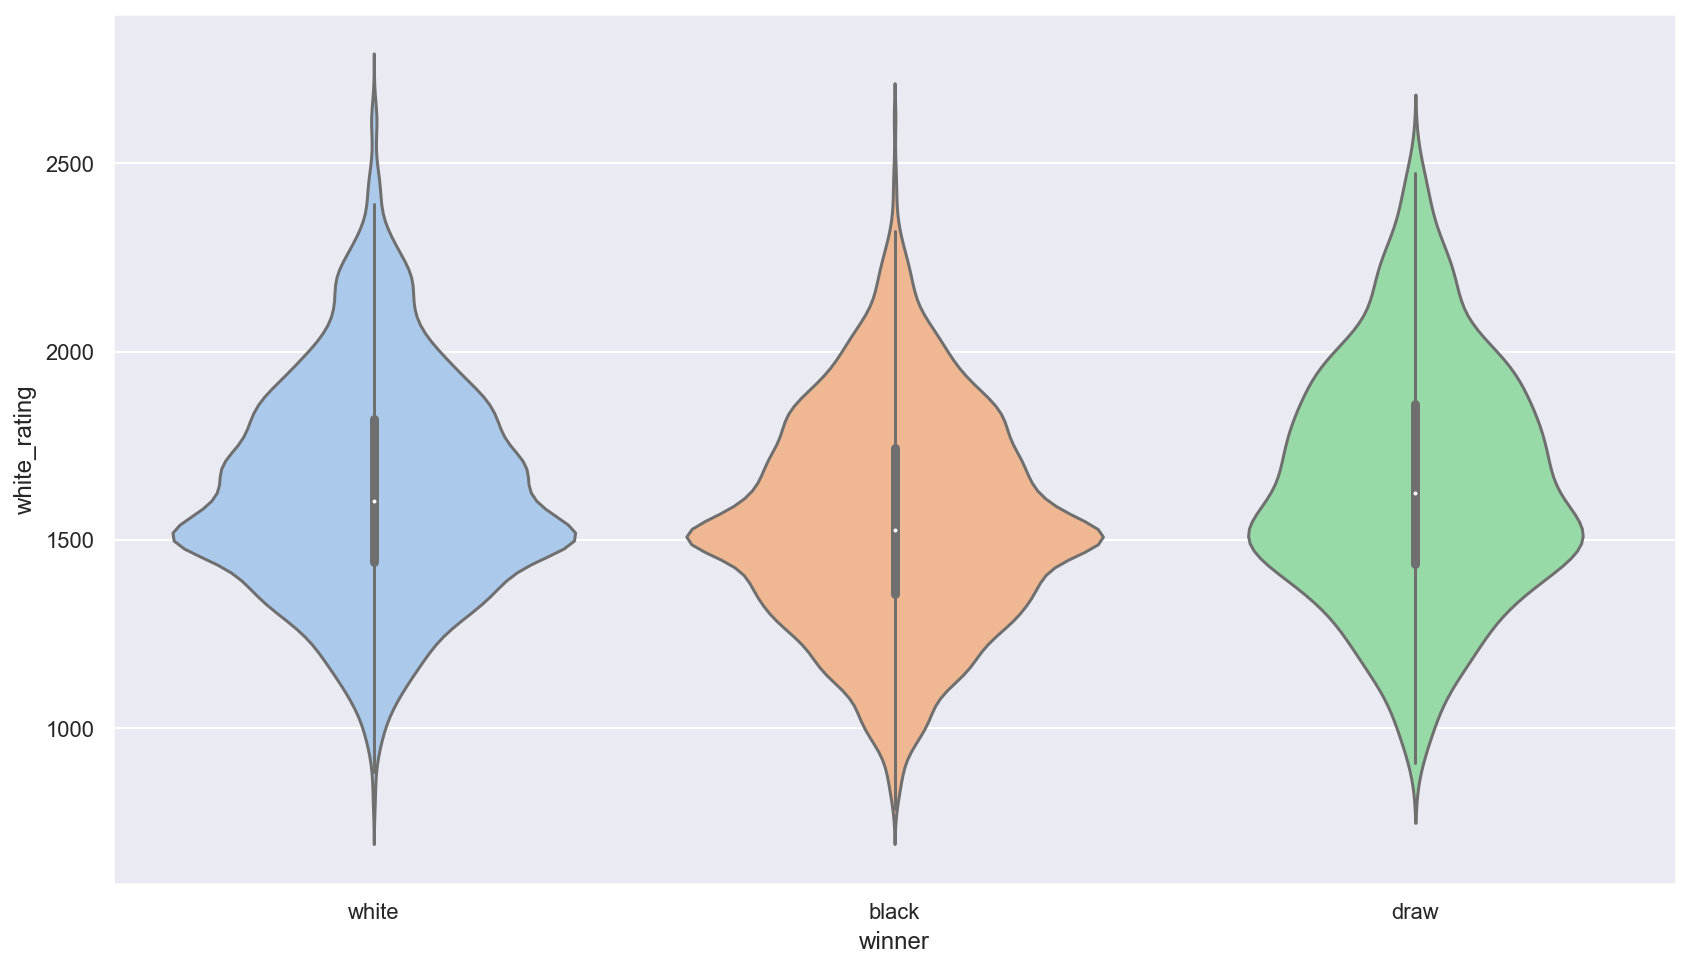

In [25]:
sns.violinplot(x=df["winner"], y=df["white_rating"])



### Black_rating by winner

<AxesSubplot:xlabel='winner', ylabel='black_rating'>

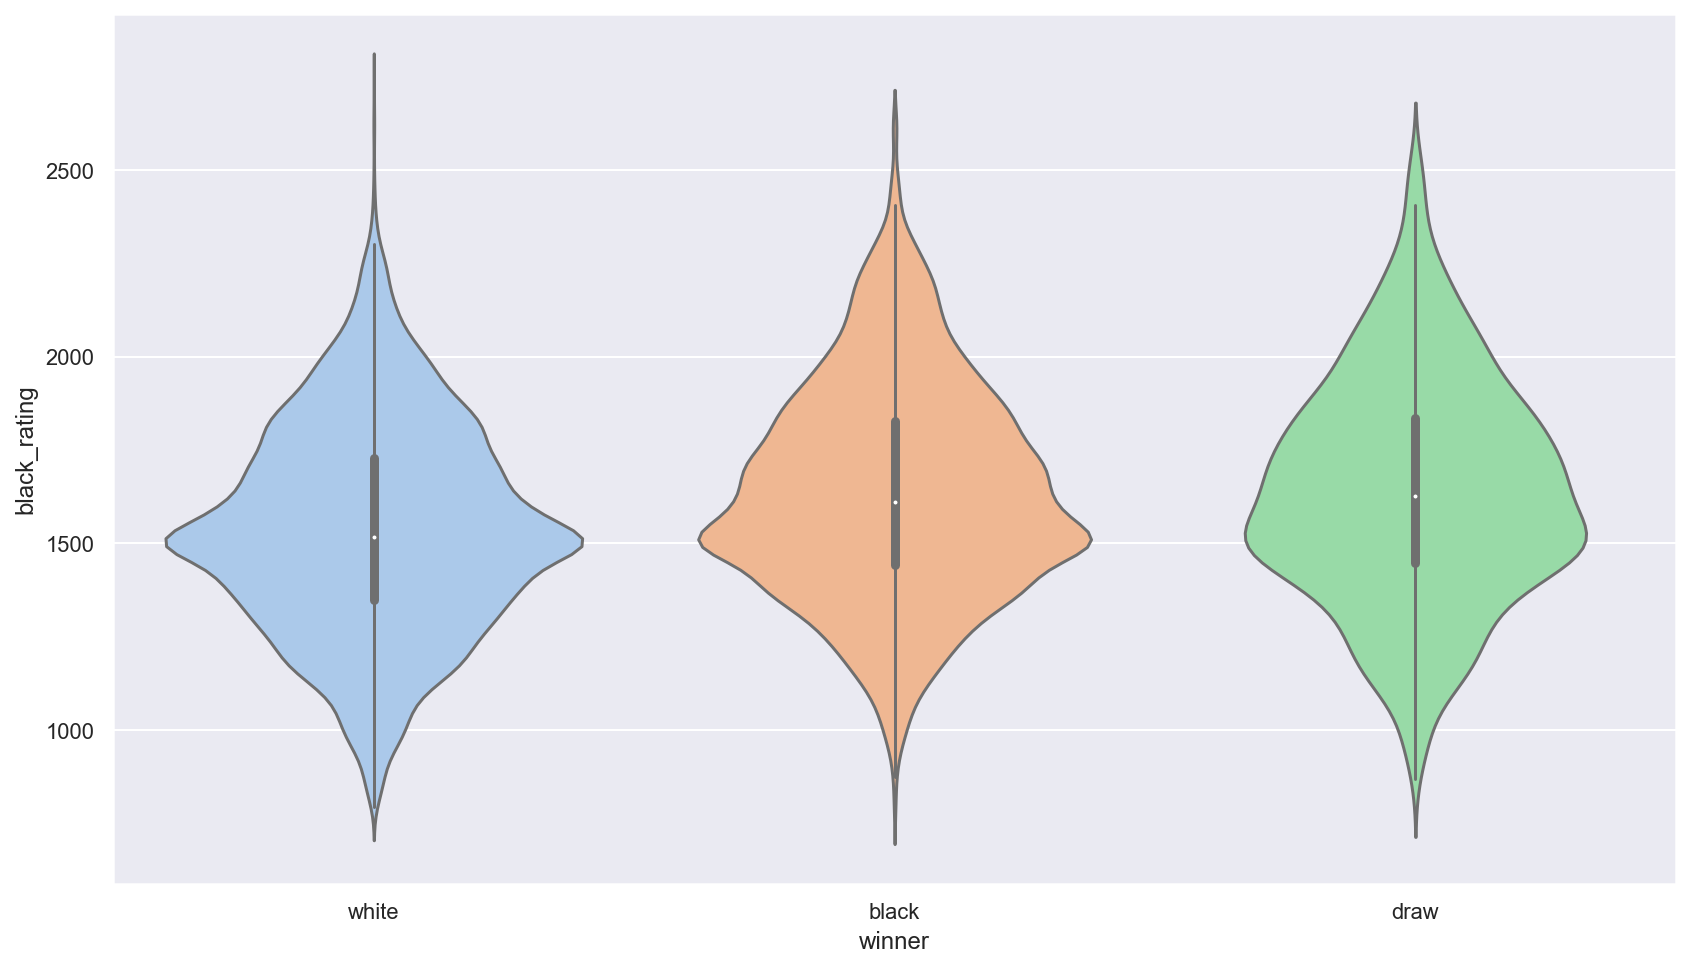

In [26]:
sns.violinplot(x=df["winner"], y=df["black_rating"])


# Categorical / Numerical Split

In [27]:
### Categorical Features
categorical = df.select_dtypes(exclude = 'int64')

### Numerical Features
numerical = df.select_dtypes(include = 'int64') 

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


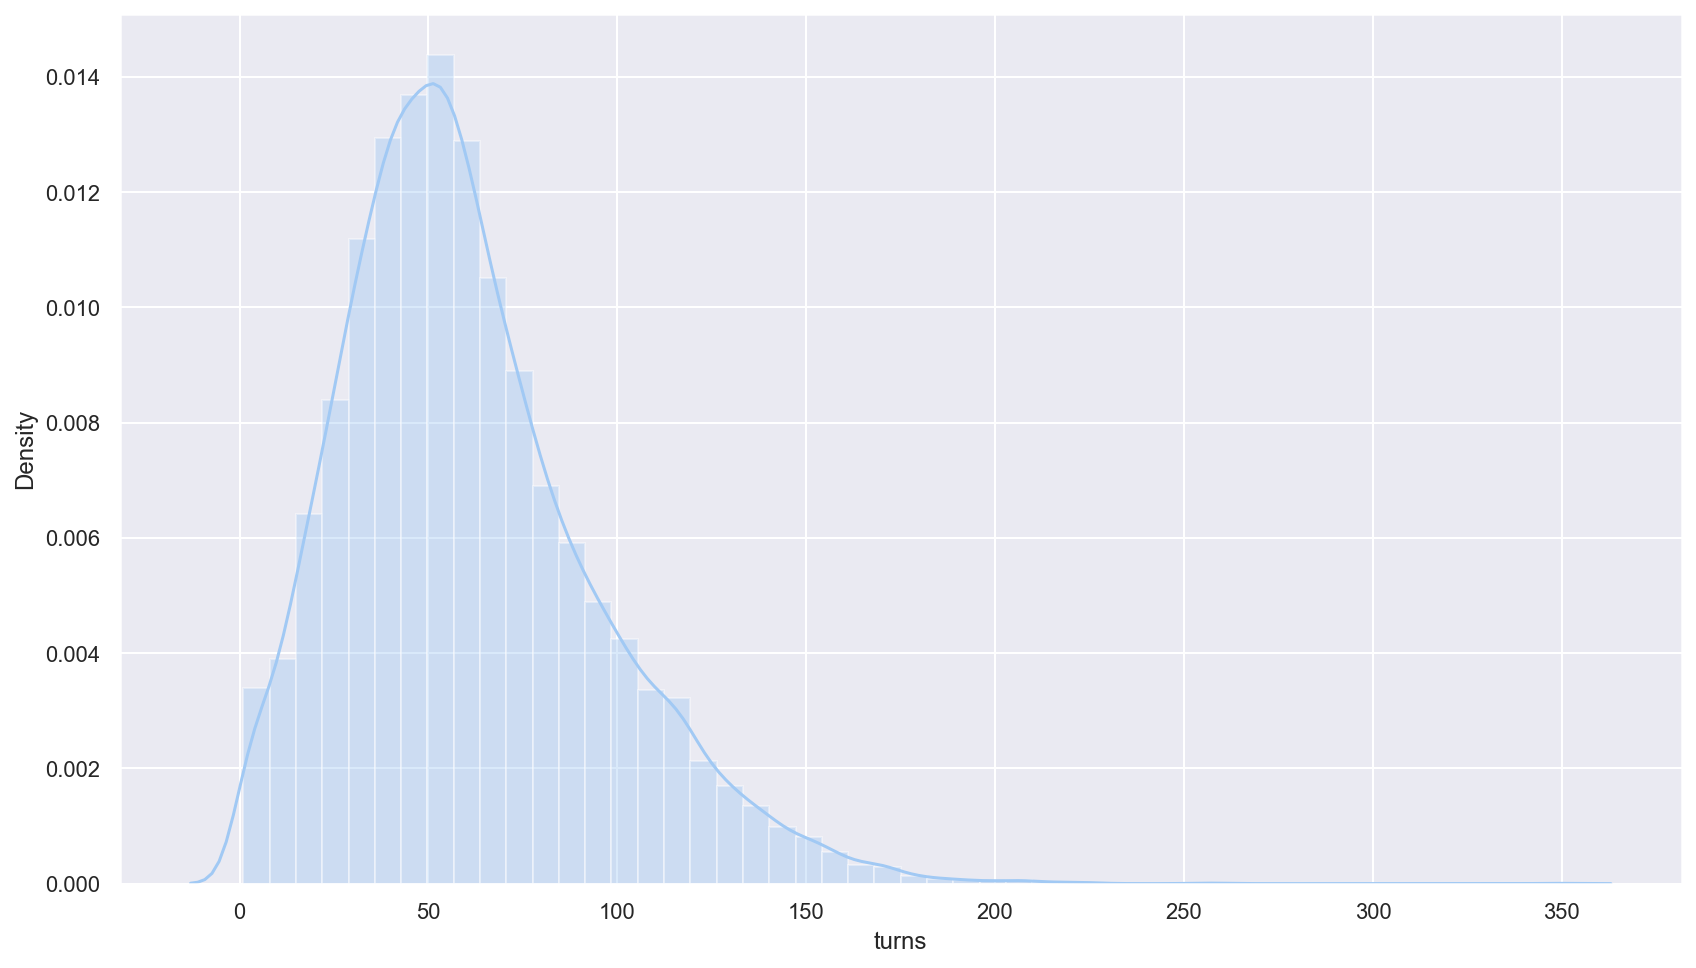

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


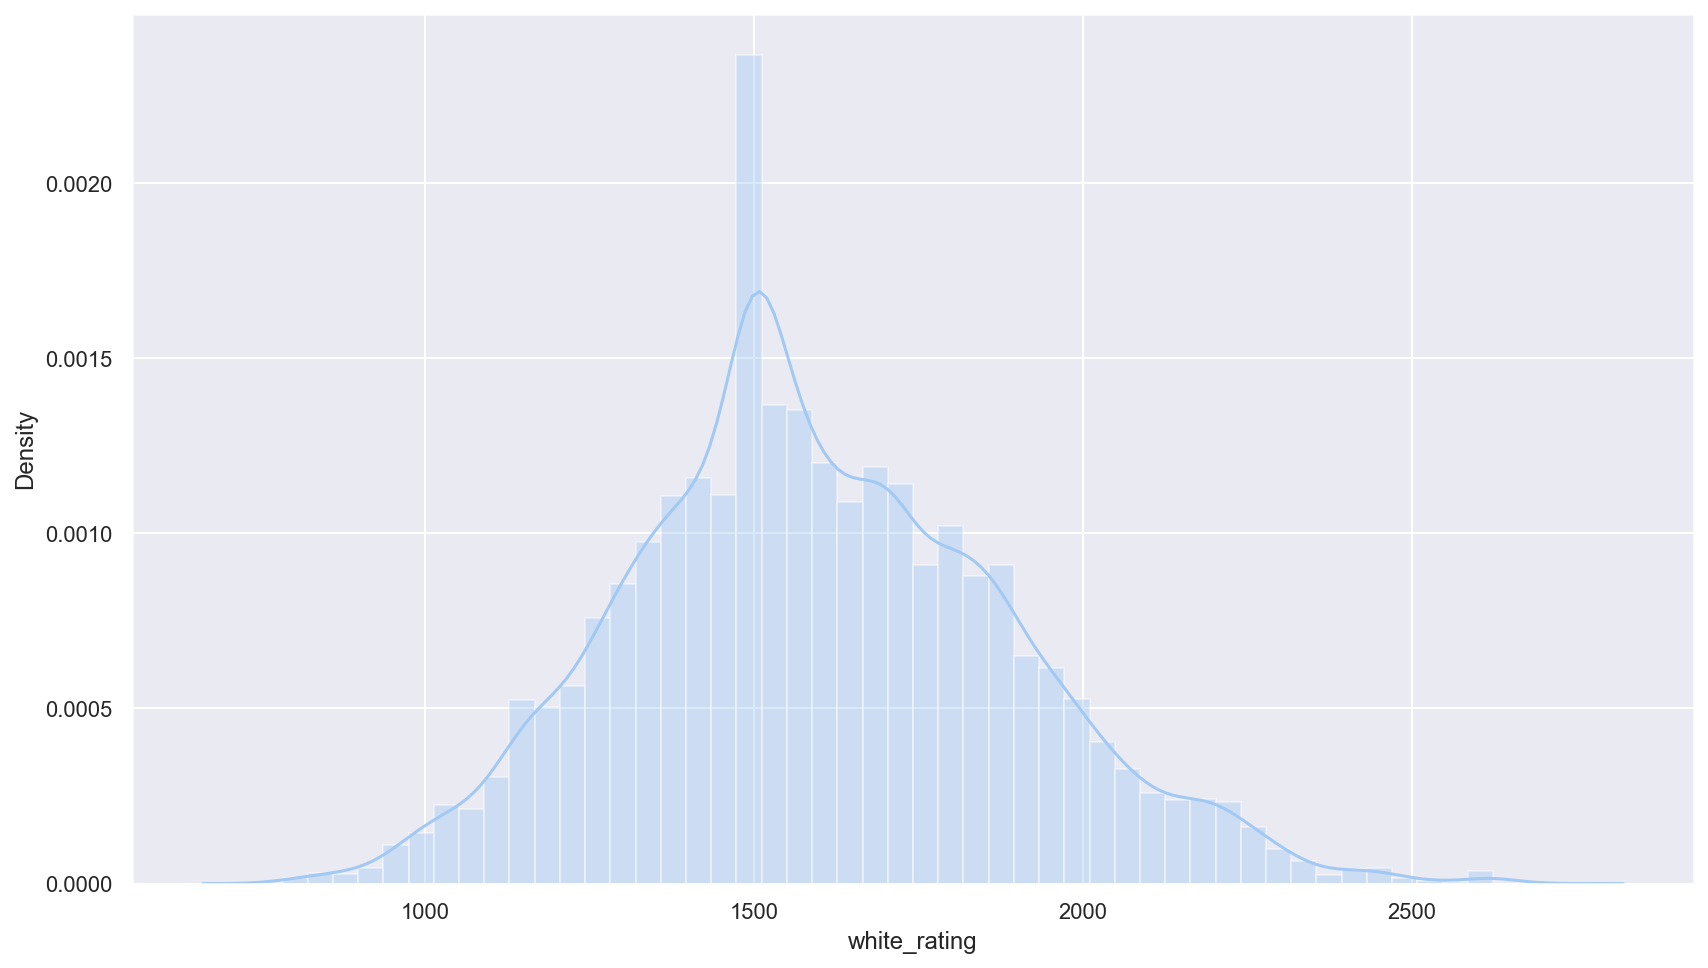

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


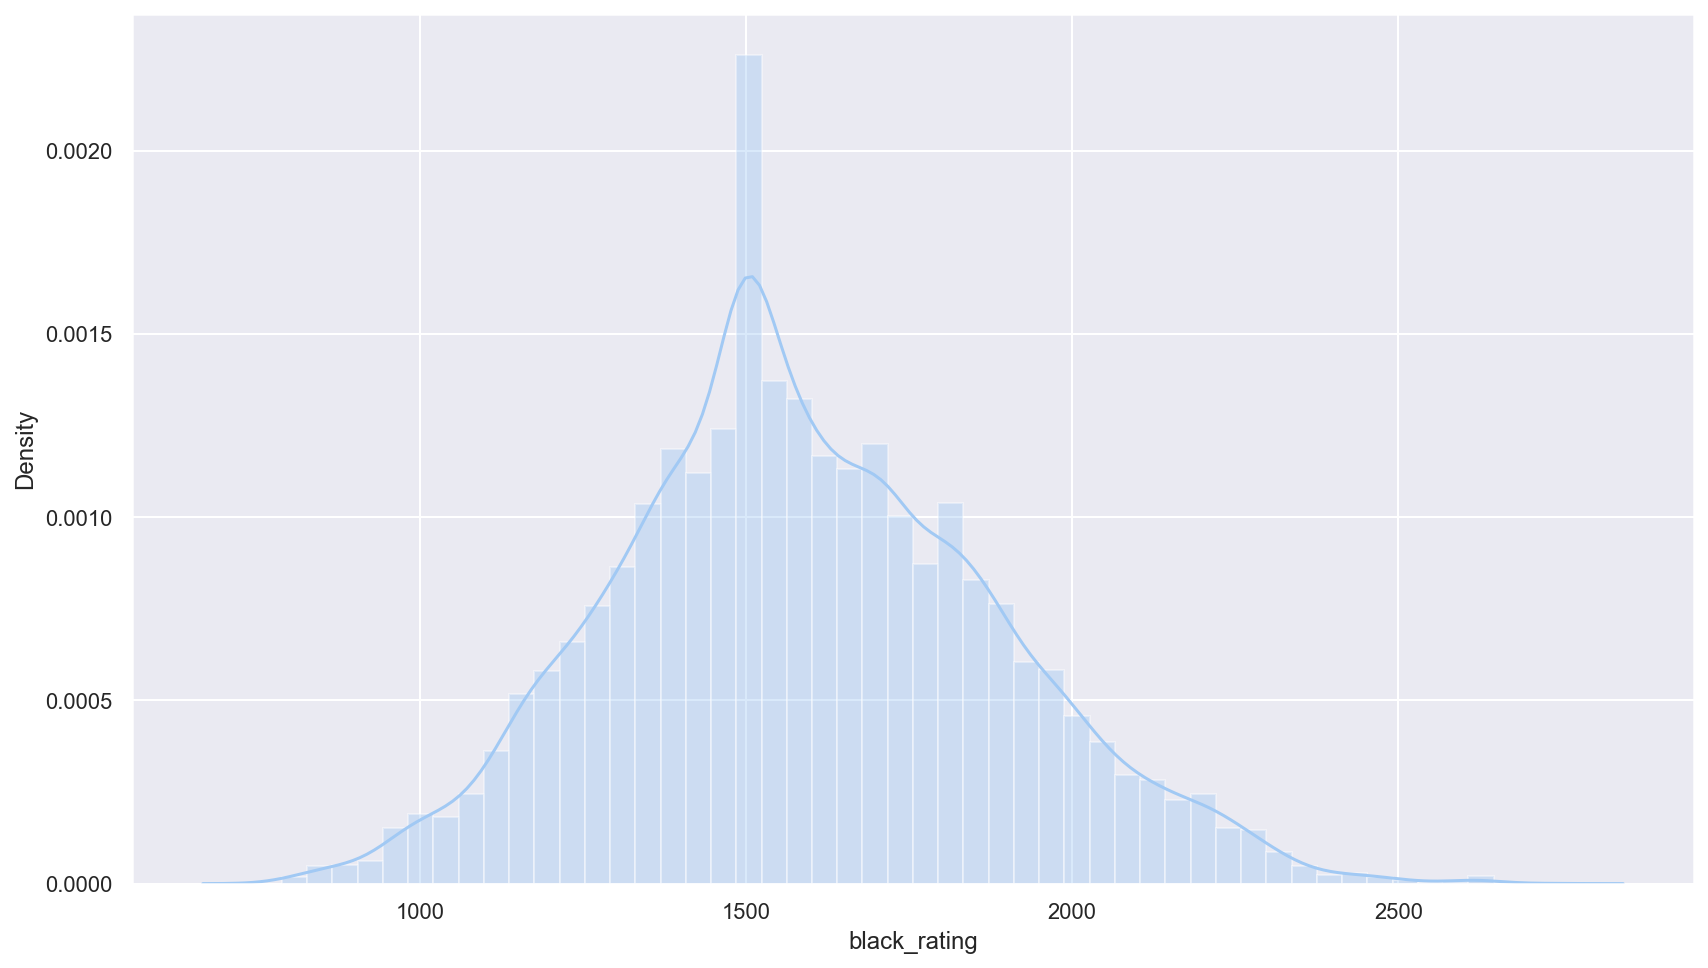

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


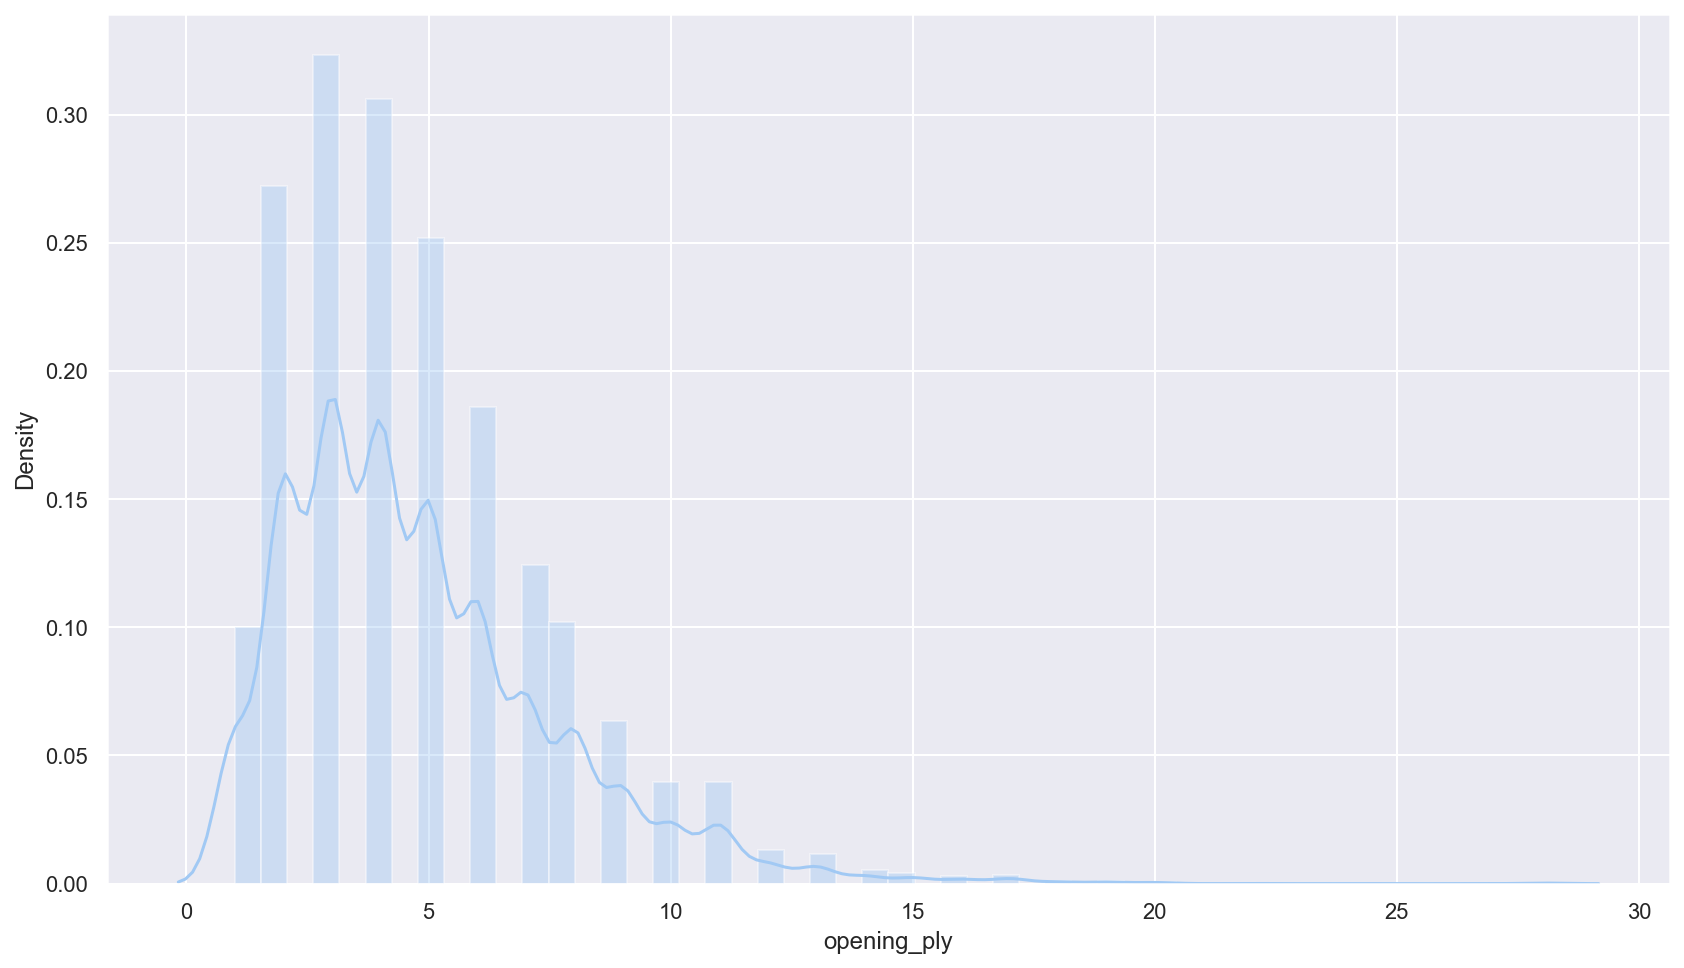

In [28]:
# density for the numerical variables
import seaborn as sns

for feature in numerical:
    sns.distplot(df[feature])
    plt.show()

# Dropping unnecessary values

In [29]:
# Dropping the rows where the result it's a draw
# We want to get a binary target value
df['winner'] = df['winner'].drop(df[df['winner'] == 'draw'].index)

In [30]:
df.winner.value_counts()

white    9545
black    8680
Name: winner, dtype: int64

In [31]:
#Check if the are NaN values after the draws drop
df.isna().sum()

id                  0
rated               0
created_at          0
last_move_at        0
turns               0
victory_status      0
winner            888
increment_code      0
white_id            0
white_rating        0
black_id            0
black_rating        0
moves               0
opening_eco         0
opening_name        0
opening_ply         0
dtype: int64

In [32]:
# Removing the NaN values
df = df.dropna(subset=['winner'])
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

# Dummification of the target variable

In [33]:
## insulating the target variable
y = df['winner']

In [34]:
y.value_counts()

white    9545
black    8680
Name: winner, dtype: int64

In [35]:
#Getting the binary target value
y = pd.get_dummies (y, drop_first = True) #Dummification

In [36]:
y

,white
0,1
1,0
2,1
3,1
4,1
...,...
20053,1
20054,0
20055,1
20056,1


In [37]:
y.rename(columns={'white': 'winner'}, inplace=True)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18225 entries, 0 to 20057
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   winner  18225 non-null  uint8
dtypes: uint8(1)
memory usage: 160.2 KB


In [38]:
y.value_counts()

winner
1         9545
0         8680
dtype: int64

# Density for the target variable y = 'winner'

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

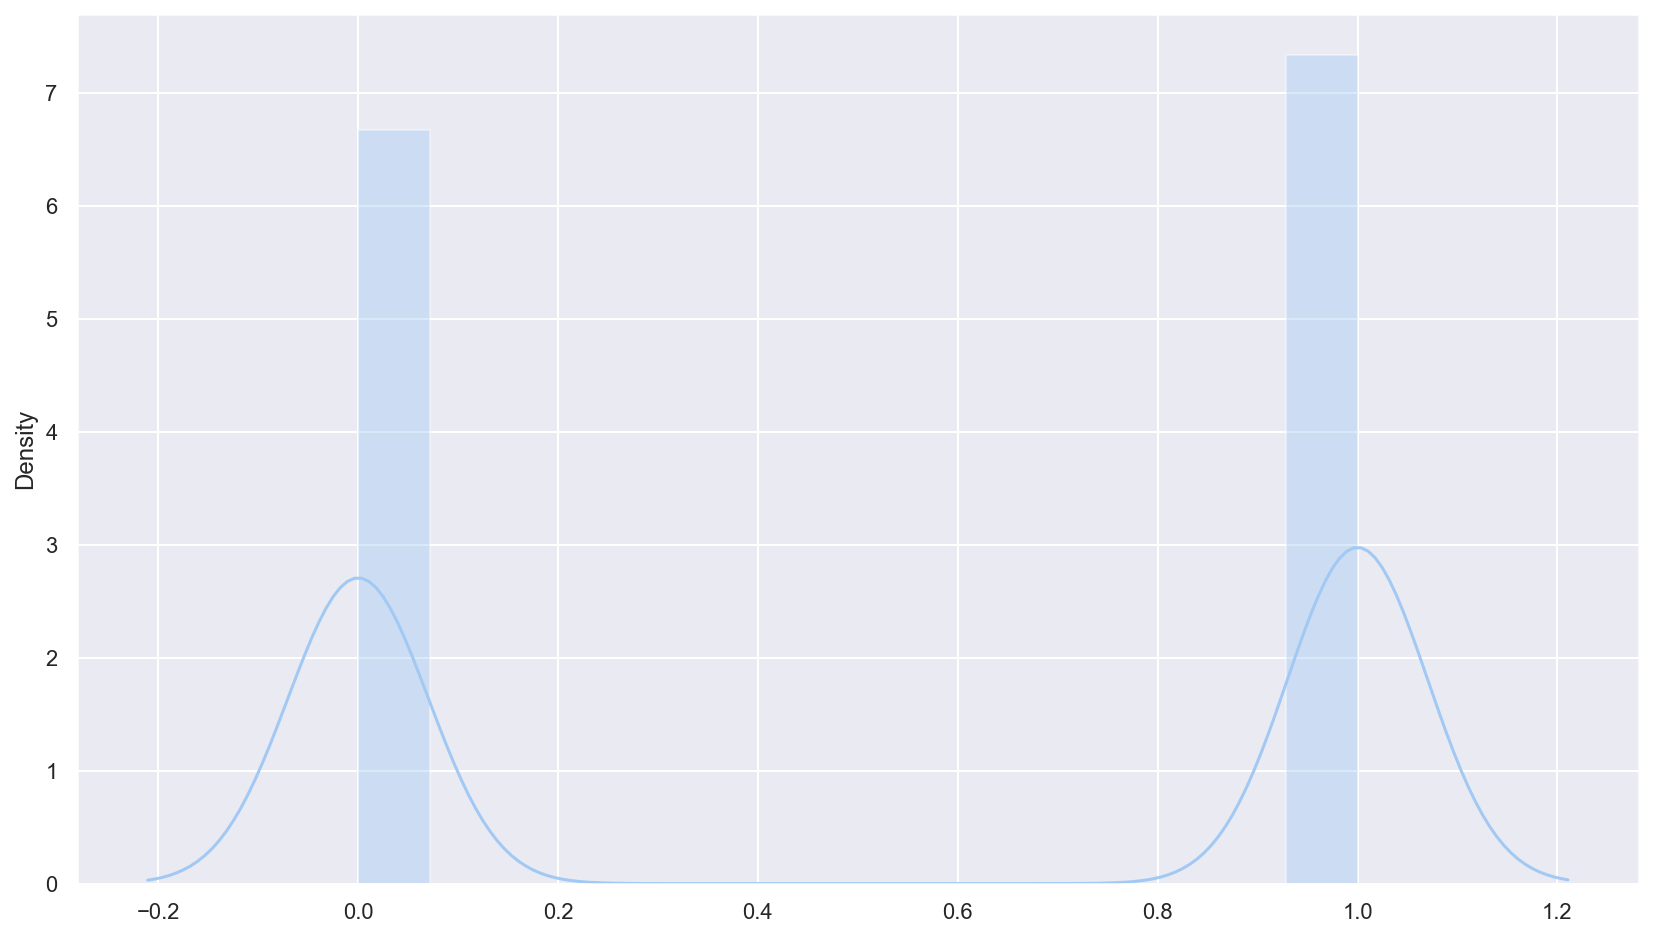

In [39]:
# density for the target variable y= "winner"

sns.distplot(y, label = '0 = Blacks')

#p.set_xlabel("X-Axis", fontsize = 20)
#p.set_ylabel("Y-Axis", fontsize = 20)


### Blacks = 0

### Whites = 1

In [40]:
df['winner'] = y

# BIVARIATE ANALYSIS

In [41]:
# goal: to study patterns clusters of one variable in terms of other

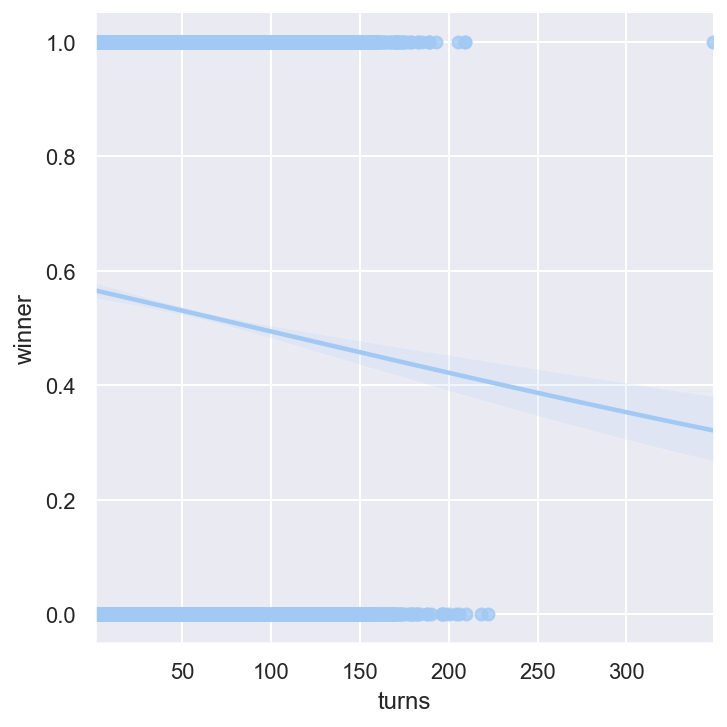

In [42]:
sns.lmplot(x = 'turns', y = 'winner', data = df, logistic= True) # logit regression on 

#variables X = feature, y = winner

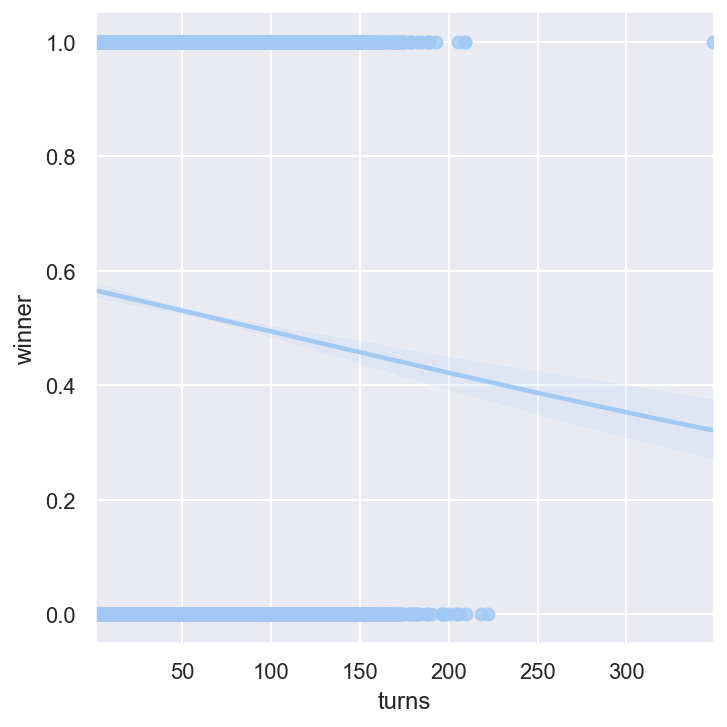

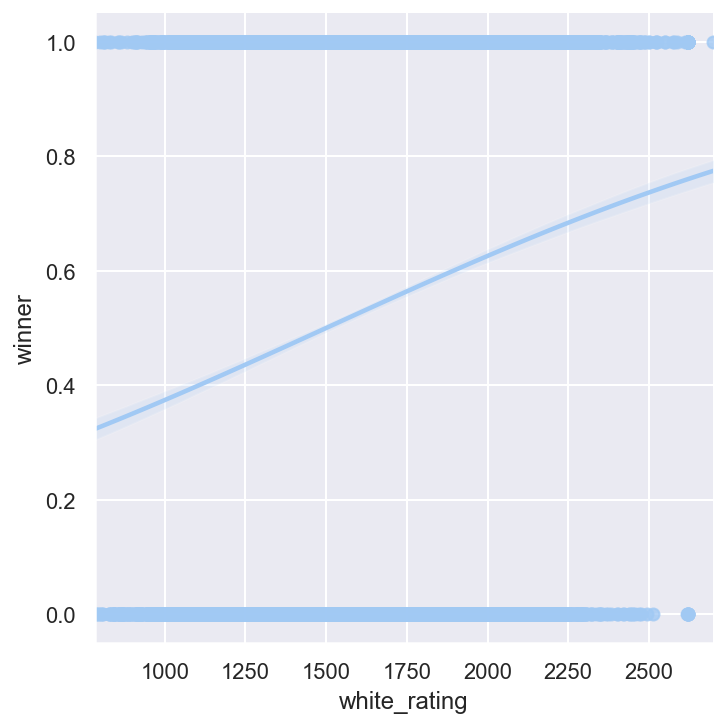

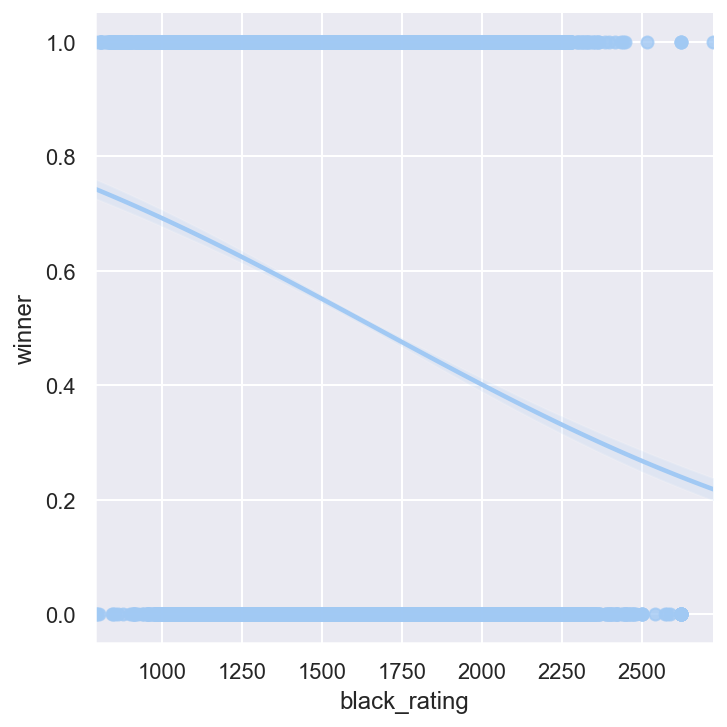

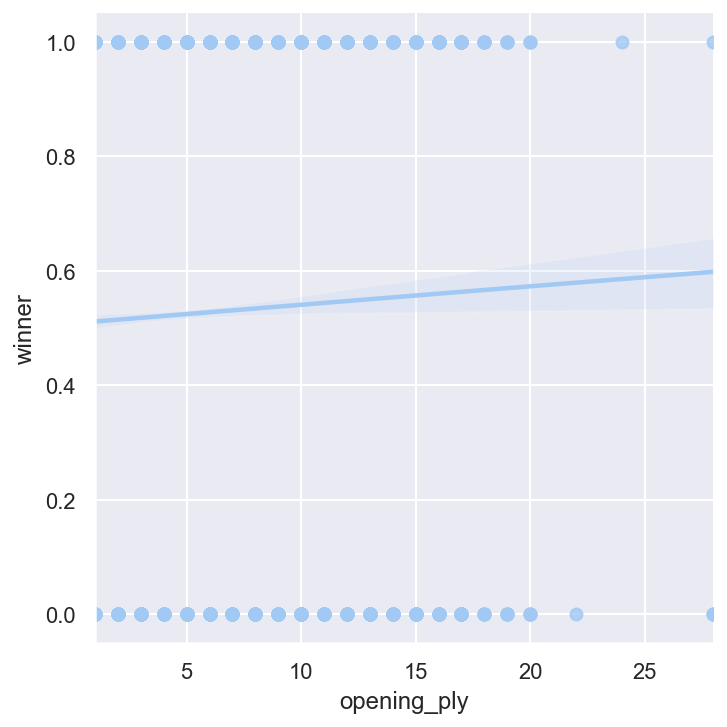

In [43]:
for feature in numerical:
    sns.lmplot(x = feature, y = 'winner', data = df, logistic = True)


I'm going to the has a 'X' value the feature 'Turns' because i've seen that in the first 150 moves there is a smaller error on fitting a logistic model

<AxesSubplot:xlabel='turns', ylabel='winner'>

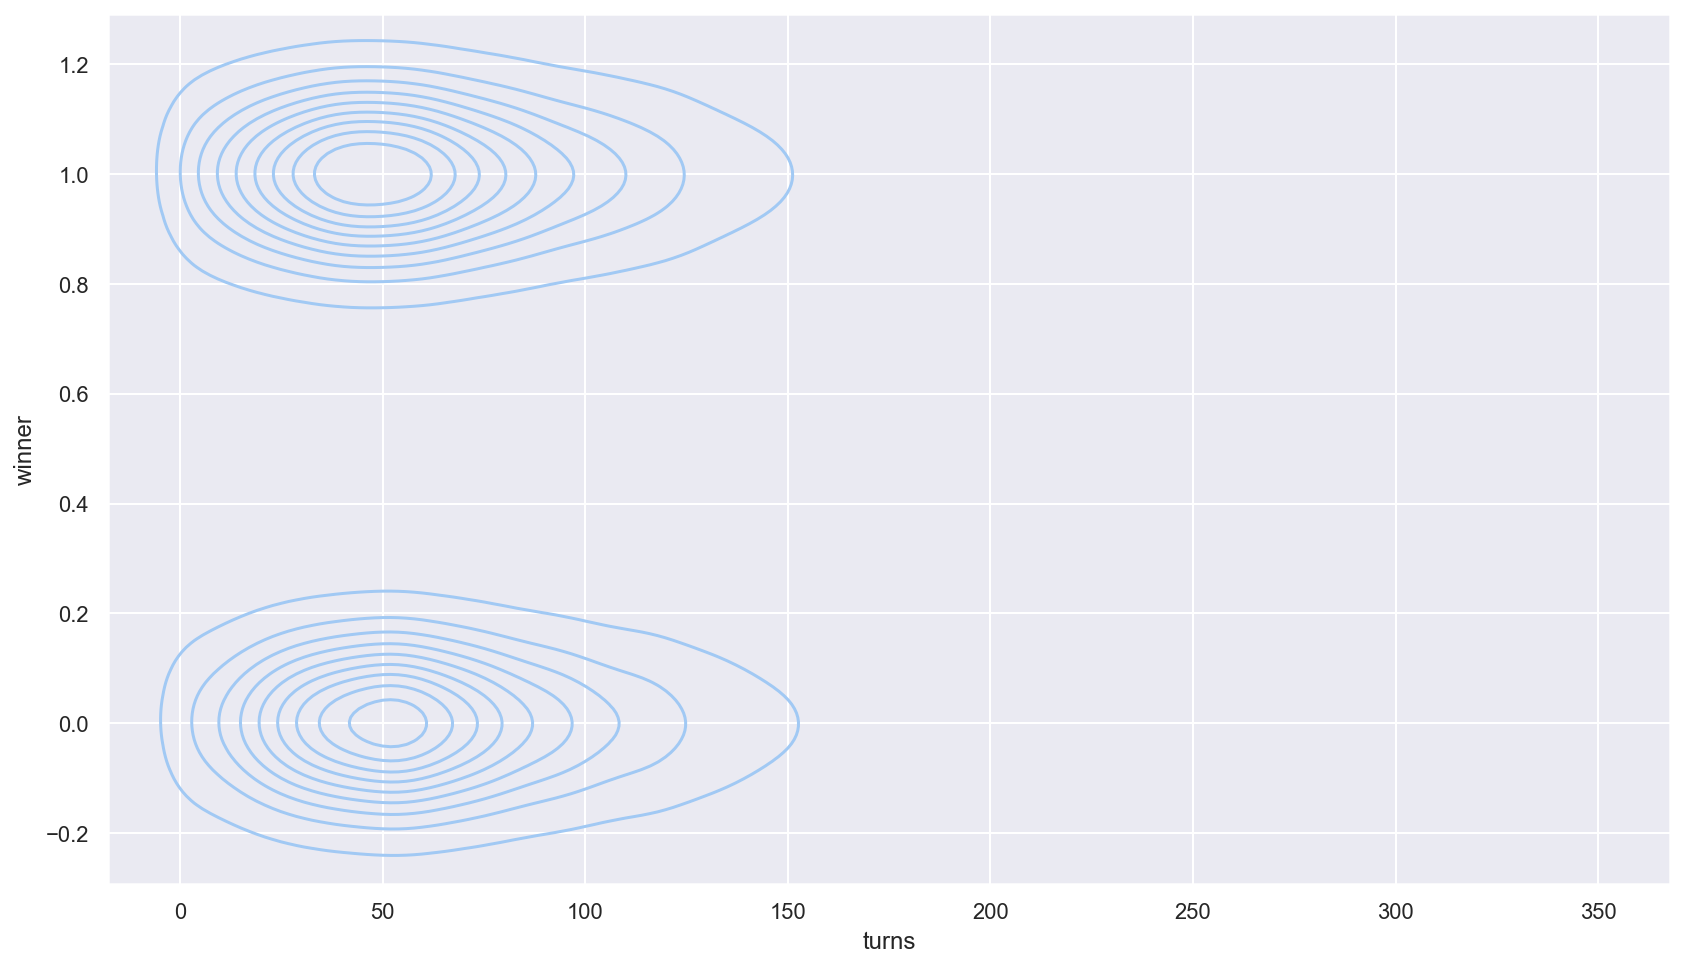

In [44]:
sns.kdeplot(x="turns", y= "winner", data=df)

# Dealing with the outliers of 'Turns'

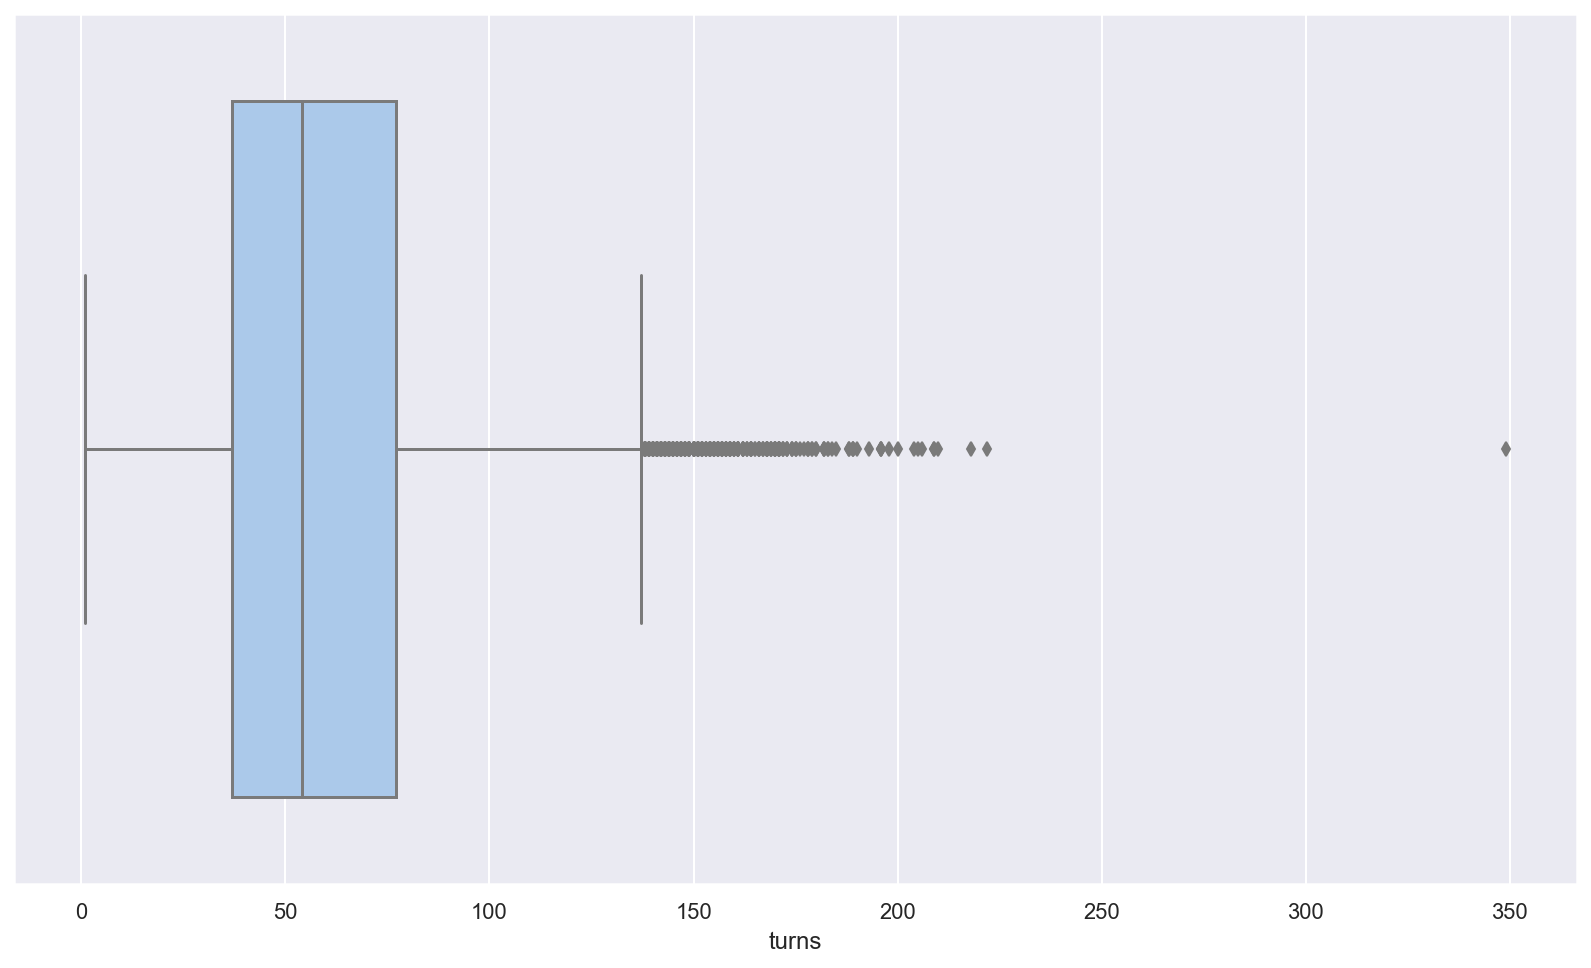

In [45]:
sns.boxplot(x = df['turns'])

plt.show()

(18225, 16)
(17809, 16)


C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


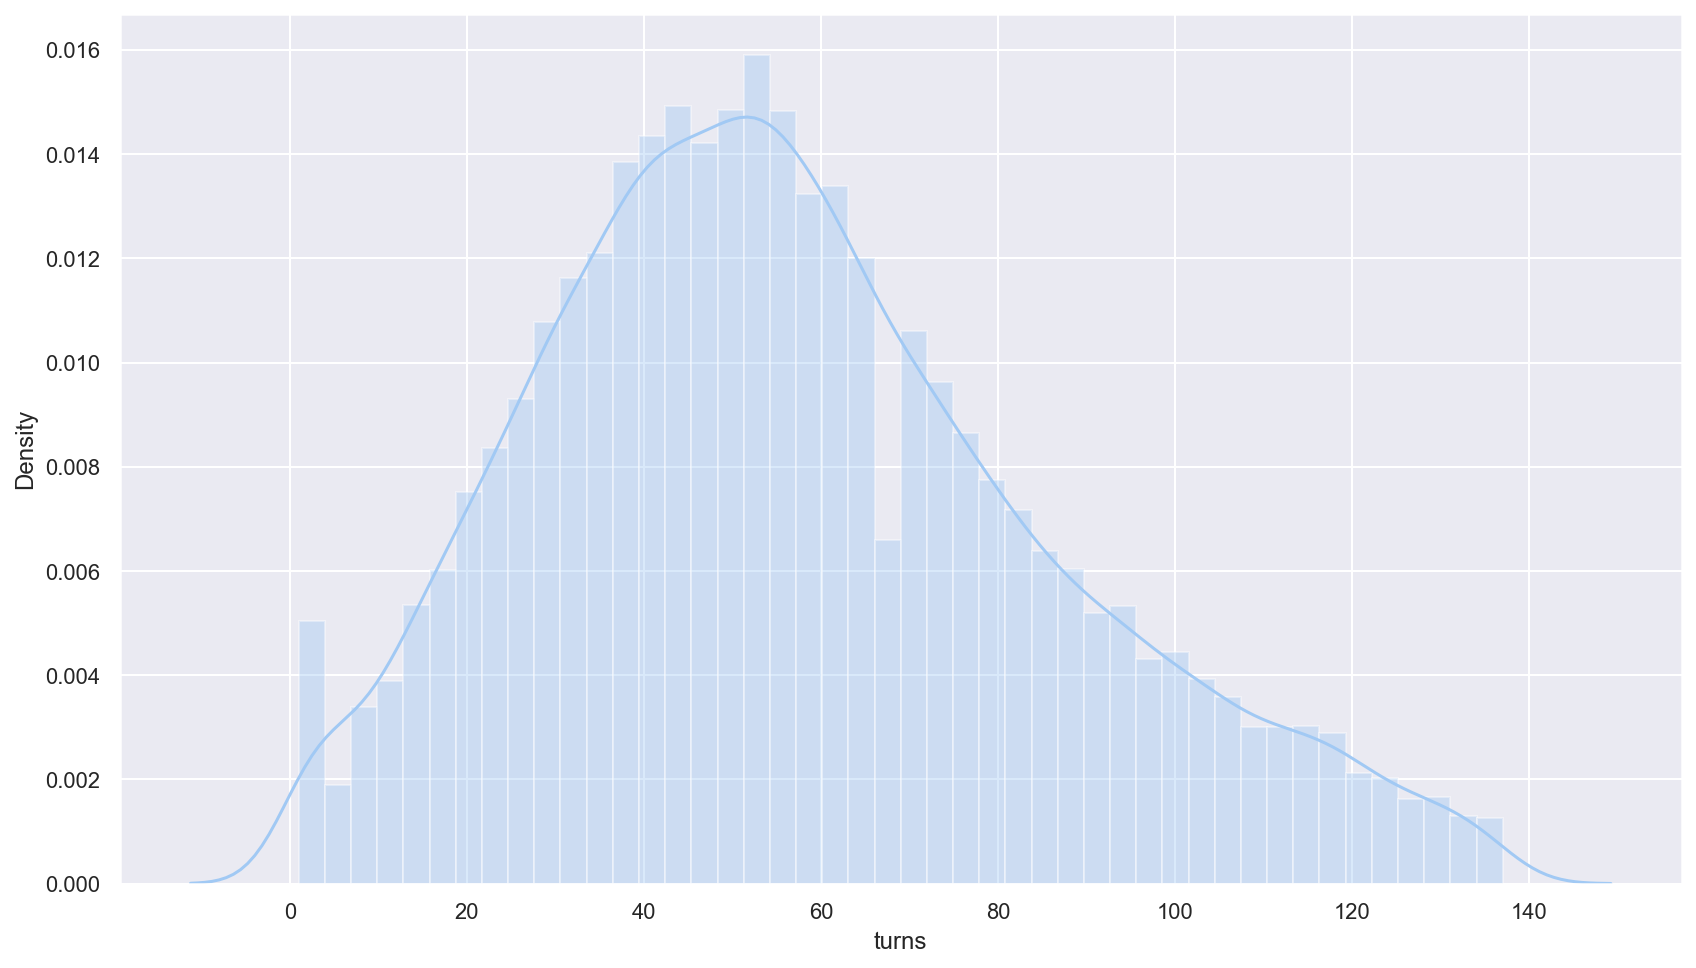

In [46]:
cols = ['turns'] #column with the outlier

for drop in cols:
    print(df.shape) # To know data's shape before drops

Q1 = df[cols].quantile(0.25)  #first quantile
Q3 = df[cols].quantile(0.75)  #second quantile
IQR = Q3 - Q1           #inter quantiler range

df = df[~(  #Negation so we get the datapoints inside of the range
    (df[cols] < (Q1 - 1.5 * IQR))
    | (df[cols] > (Q3 + 1.5 * IQR)
      )).any(axis=1)]


#Checking of look the boxplots after removing the outliers
print(df.shape)
sns.distplot(df[drop])

plt.show()

# Data modelling

## Explanatory variables and target vector

In [47]:
X = df["turns"]
y = df['winner']

## train/test split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, random_state=42)

In [49]:
X_test.to_frame()

,turns
10409,27
8484,45
10129,52
9646,37
3858,17
...,...
10387,57
12355,47
19299,45
11097,45


## Preprocessing

In [50]:
preprocessor =StandardScaler()

X_train = preprocessor.fit_transform(X_train.to_frame())
## turns_train --> (turns_train - avg(turns_train))/ std(turns_train)

X_test = preprocessor.transform(X_test.to_frame())

## turns_test ---> (turns_test - (avg(turns_train)))/std(turns_train)


In [51]:
X_train

array([[-0.17906641],
       [ 0.16827379],
       [-1.46422513],
       ...,
       [ 0.16827379],
       [ 1.2450284 ],
       [-1.08215092]])

In [52]:
X_test

array([[-1.0474169 ],
       [-0.42220454],
       [-0.17906641],
       ...,
       [-0.42220454],
       [-0.42220454],
       [-1.15161896]])

## Train the model

In [53]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

## Calculate predictions on train/test

#### Train set

In [54]:
pred_train = classifier.predict(X_train)
pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [55]:
prob_train = classifier.predict_proba(X_train)
prob_train

array([[0.47162585, 0.52837415],
       [0.47838465, 0.52161535],
       [0.44672769, 0.55327231],
       ...,
       [0.47838465, 0.52161535],
       [0.49937626, 0.50062374],
       [0.45410768, 0.54589232]])

#### Test set

In [56]:
pred_test = classifier.predict(X_test)
pred_test

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [57]:
prob_test = classifier.predict_proba(X_test)
prob_test

array([[0.45477964, 0.54522036],
       [0.46690072, 0.53309928],
       [0.47162585, 0.52837415],
       ...,
       [0.46690072, 0.53309928],
       [0.46690072, 0.53309928],
       [0.45276427, 0.54723573]])

## Evaluate

### Accuracy/ F1 score


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
#Accuracy
print("accuracy on train set: ", accuracy_score(y_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_test, pred_test))

accuracy on train set:  0.5253818508535489
accuracy on test set:  0.5275095441275545


In [60]:
## here it seems we have underfitting (slight but still very good performance) since the accuracy on test set is higher
##than on the train set 

## there is space to learn // e.g. shrink your test size a bit

In [61]:
from sklearn.metrics import f1_score

In [62]:
#F1 score
print("f1 score on train set: ", f1_score(y_train, pred_train))
print("f1 score on test set: ", f1_score(y_test, pred_test))

f1 score on train set:  0.6611791116574911
f1 score on test set:  0.6634676903390915


## Confusion matrices train/test sets

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

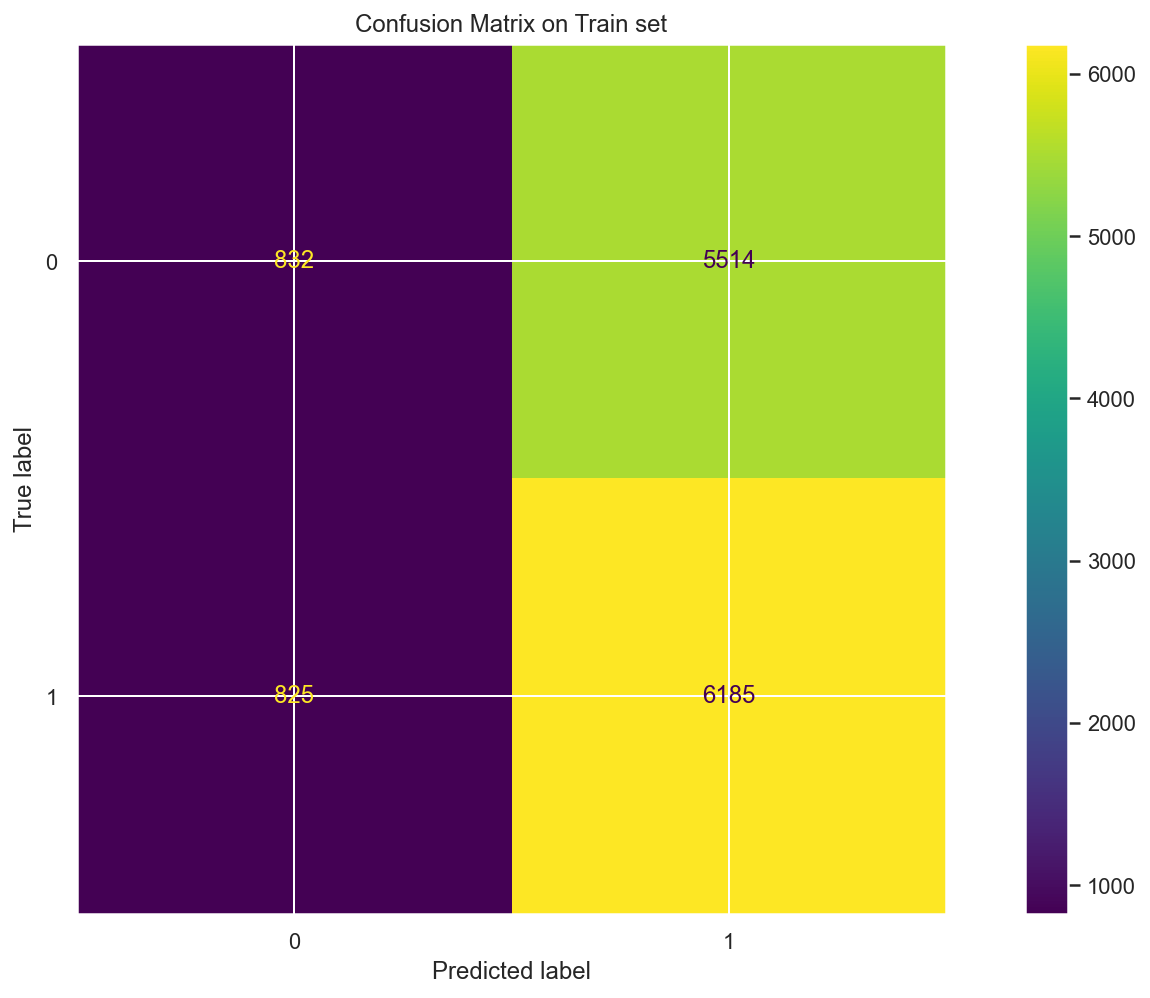

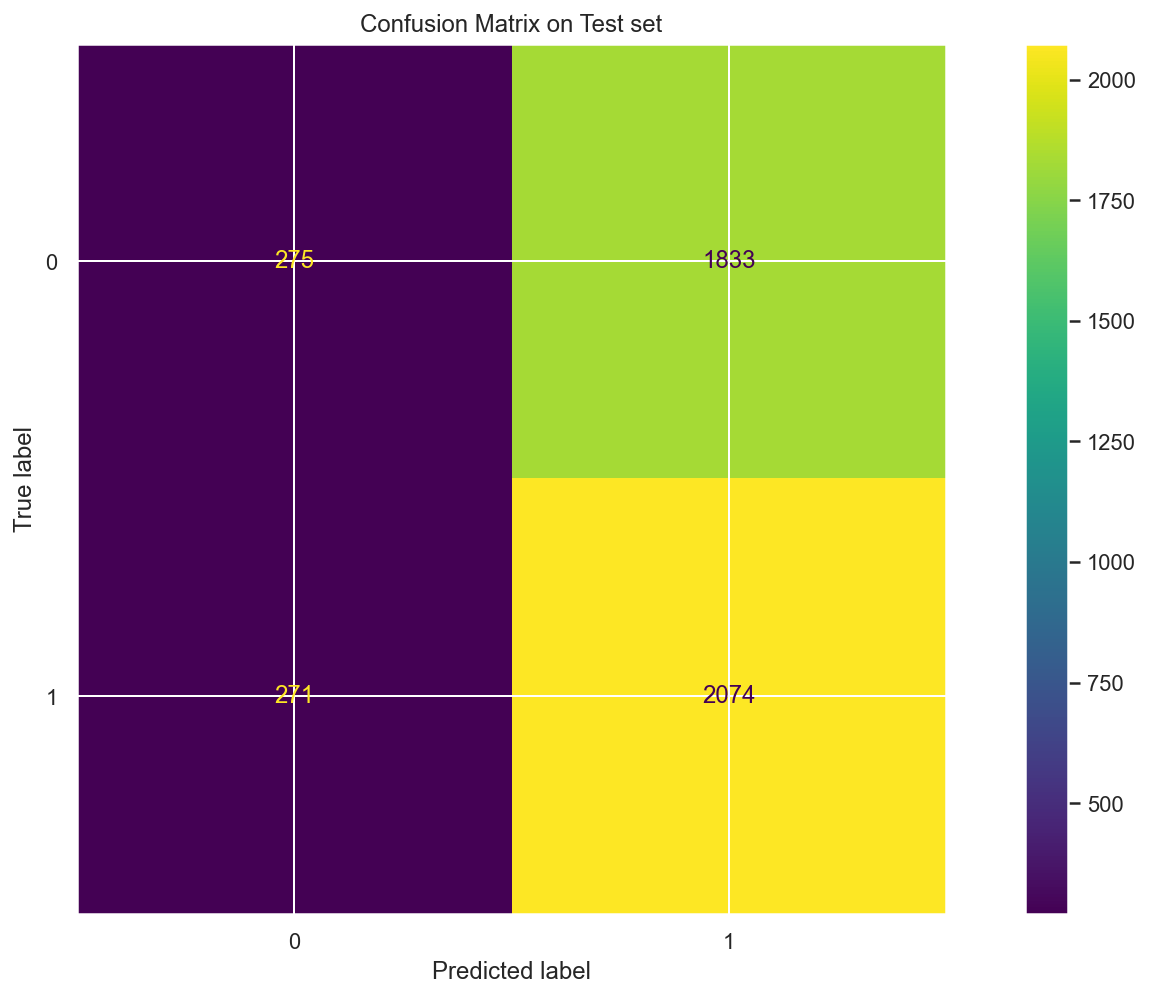

In [64]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()


# Classification of Features

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_train, pred_train))

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.50      0.13      0.21      6346
           1       0.53      0.88      0.66      7010

    accuracy                           0.53     13356
   macro avg       0.52      0.51      0.43     13356
weighted avg       0.52      0.53      0.45     13356

              precision    recall  f1-score   support

           0       0.50      0.13      0.21      2108
           1       0.53      0.88      0.66      2345

    accuracy                           0.53      4453
   macro avg       0.52      0.51      0.44      4453
weighted avg       0.52      0.53      0.45      4453



# Visualize ROC curves

In [67]:
from sklearn.metrics import RocCurveDisplay

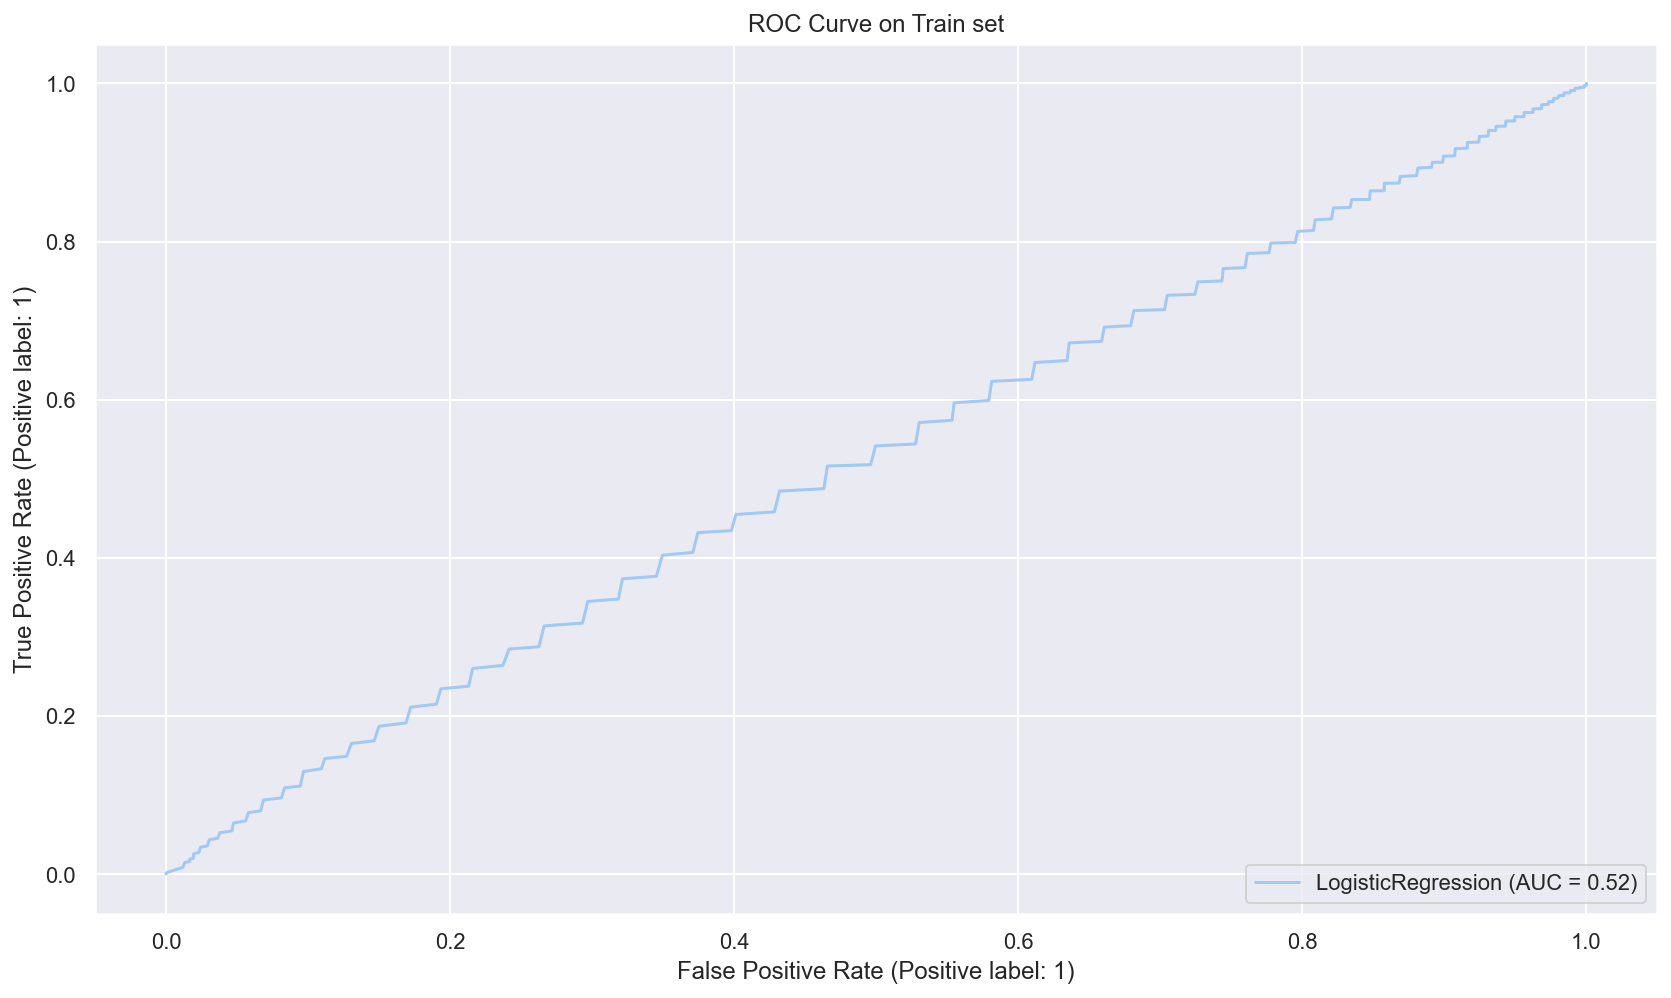

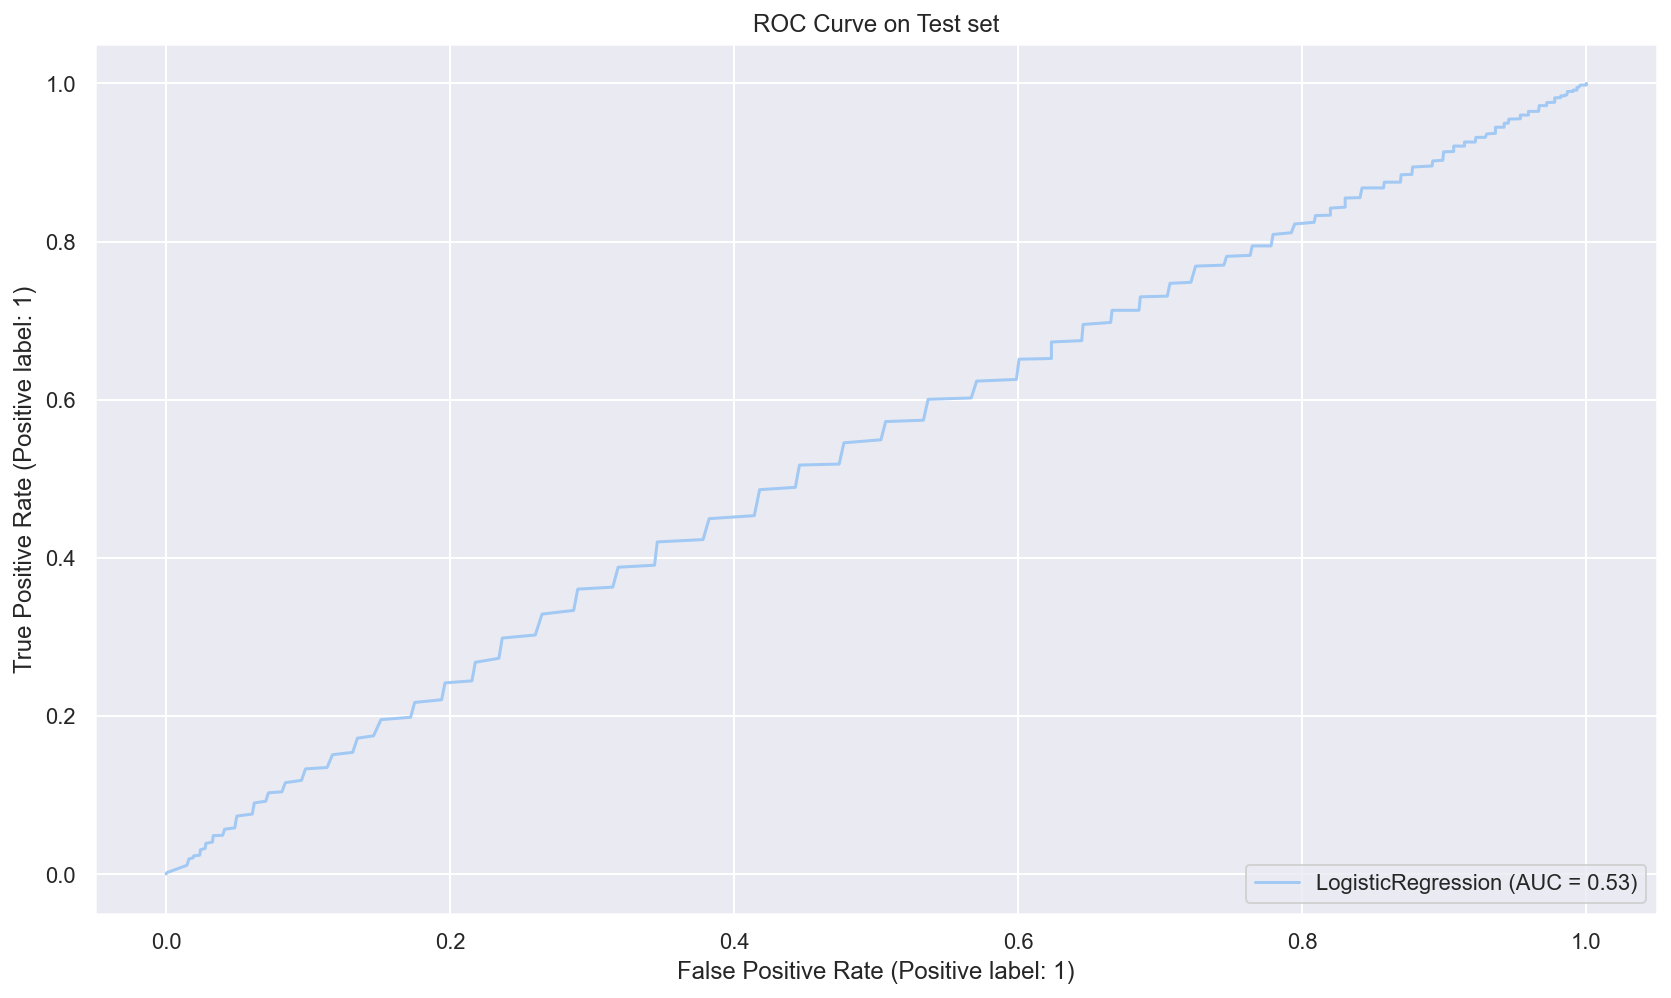

In [68]:

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn

plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn

plt.show()

# Multivariate logistic regression

## X and y

In [69]:
# transforming the columns 'opening_eco' to a numerical value

test = df['opening_eco'].value_counts()/len(df)
df['eco_code'] = df['opening_eco'].map(test)

# we have added a new column with the same values of opening_eco but turned to numbers

In [70]:
X = df.iloc[: , [4, 9, 11, 16]]

y= df['winner']

In [71]:
X

,turns,white_rating,black_rating,eco_code
0,13,1500,1191,0.005391
1,16,1322,1261,0.030266
2,61,1496,1500,0.034140
3,61,1439,1454,0.021731
4,95,1523,1469,0.033747
...,...,...,...,...
20053,24,1691,1220,0.002808
20054,82,1233,1196,0.003987
20055,35,1219,1286,0.036498
20056,109,1360,1227,0.015161


In [72]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20053    1
20054    0
20055    1
20056    1
20057    0
Name: winner, Length: 17809, dtype: uint8

In [73]:
#Getting the binary target value
y = pd.get_dummies (y, drop_first = True) #Dummification

In [74]:
y.value_counts()

1
1    9355
0    8454
dtype: int64

## Train/Test split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Preprocessing

In [76]:
preprocessor = StandardScaler()

X_train = preprocessor.fit_transform(X_train)
## turns_train --> (turns_train - avg(turns_train))/ std(turns_train)

X_test = preprocessor.transform(X_test)

## turns_test ---> (turns_test - (avg(turns_train)))/std(turns_train)

In [77]:
X_train

array([[-0.17906641,  2.42998492,  2.6190847 , -0.35727427],
       [ 0.16827379, -0.92638008, -1.42174834,  0.24679965],
       [-1.46422513,  1.32509458,  0.77856828, -1.18507929],
       ...,
       [ 0.16827379,  0.18545926,  0.22156989, -0.53998799],
       [ 1.2450284 , -0.16199053, -0.08979567, -0.98372131],
       [-1.08215092,  0.81434339, -0.29391309,  0.70917723]])

In [78]:
X_test

array([[-1.0474169 , -1.41975878, -0.54646516, -0.26405299],
       [-0.42220454,  2.57591384,  1.8994843 , -1.12914651],
       [-0.17906641, -1.33637083, -0.99275579,  1.24613183],
       ...,
       [-0.42220454, -0.3774094 , -1.52207724,  2.14851387],
       [-0.42220454, -0.12029656, -0.12439184, -0.66304009],
       [-1.15161896, -1.50314673, -0.38386314, -1.04711178]])

## Train the model

In [79]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Predictions

In [80]:
pred_train = classifier.predict(X_train)
display(pred_train)

pred_test = classifier.predict(X_test)
display(pred_test)

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

array([0, 1, 0, ..., 1, 1, 0], dtype=uint8)

In [81]:
prob_train = classifier.predict_proba(X_train)
display(prob_train)

prob_test = classifier.predict_proba(X_test)
display(prob_test)

array([[0.53885189, 0.46114811],
       [0.33515746, 0.66484254],
       [0.29988668, 0.70011332],
       ...,
       [0.47614255, 0.52385745],
       [0.49115173, 0.50884827],
       [0.20567967, 0.79432033]])

array([[0.67594883, 0.32405117],
       [0.29281794, 0.70718206],
       [0.57281235, 0.42718765],
       ...,
       [0.21375268, 0.78624732],
       [0.45130926, 0.54869074],
       [0.7212398 , 0.2787602 ]])

## Evaluate

### Accuracy and F1 score

In [82]:
print("accuracy on train set: ", accuracy_score(y_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_test, pred_test))

accuracy on train set:  0.6552860137765798
accuracy on test set:  0.6575342465753424


In [83]:
print("F1 score on train set: ", f1_score(y_train, pred_train))
print("F1 score on test set: ", f1_score(y_test, pred_test))

F1 score on train set:  0.688455812694546
F1 score on test set:  0.6884576098059245


## Confusion matrix

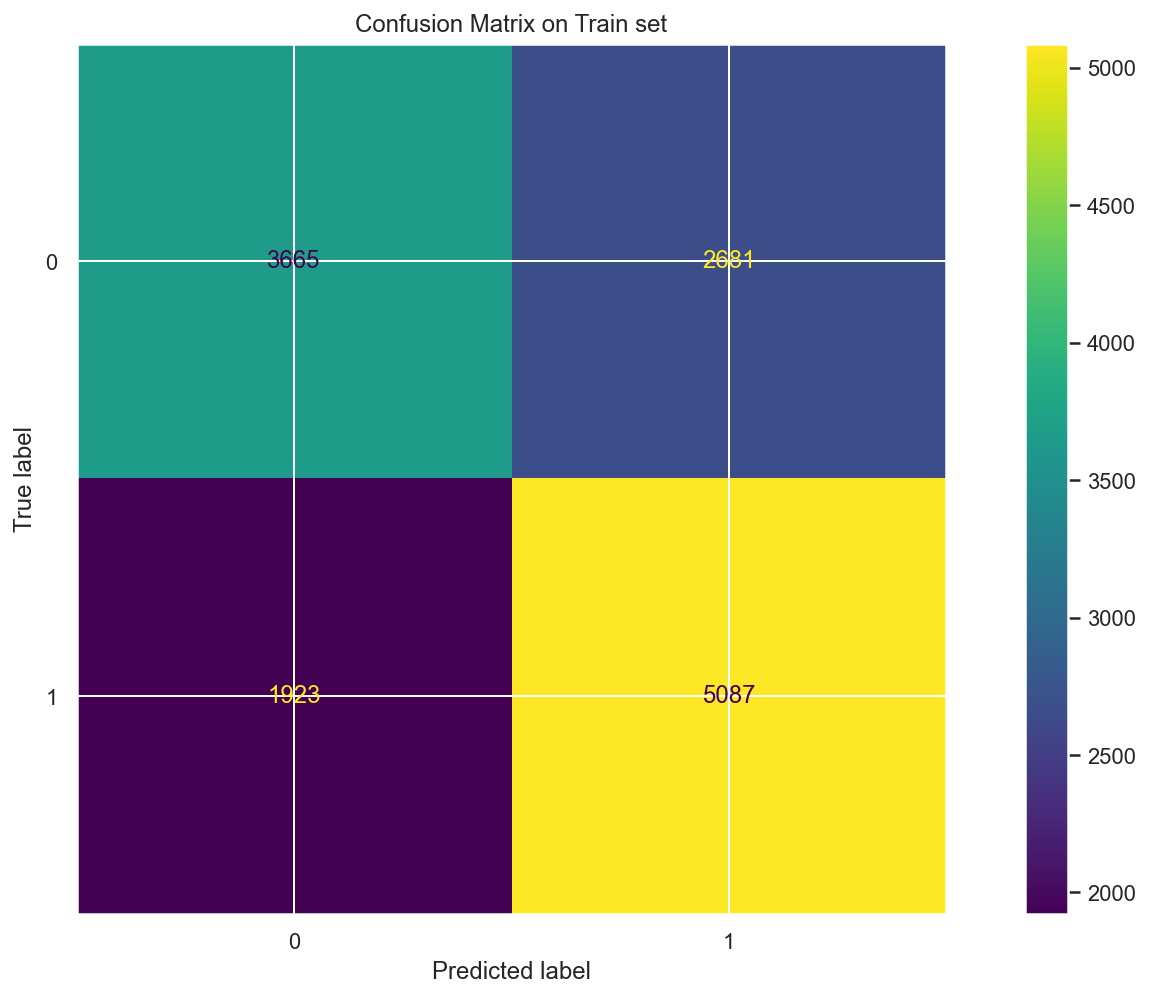

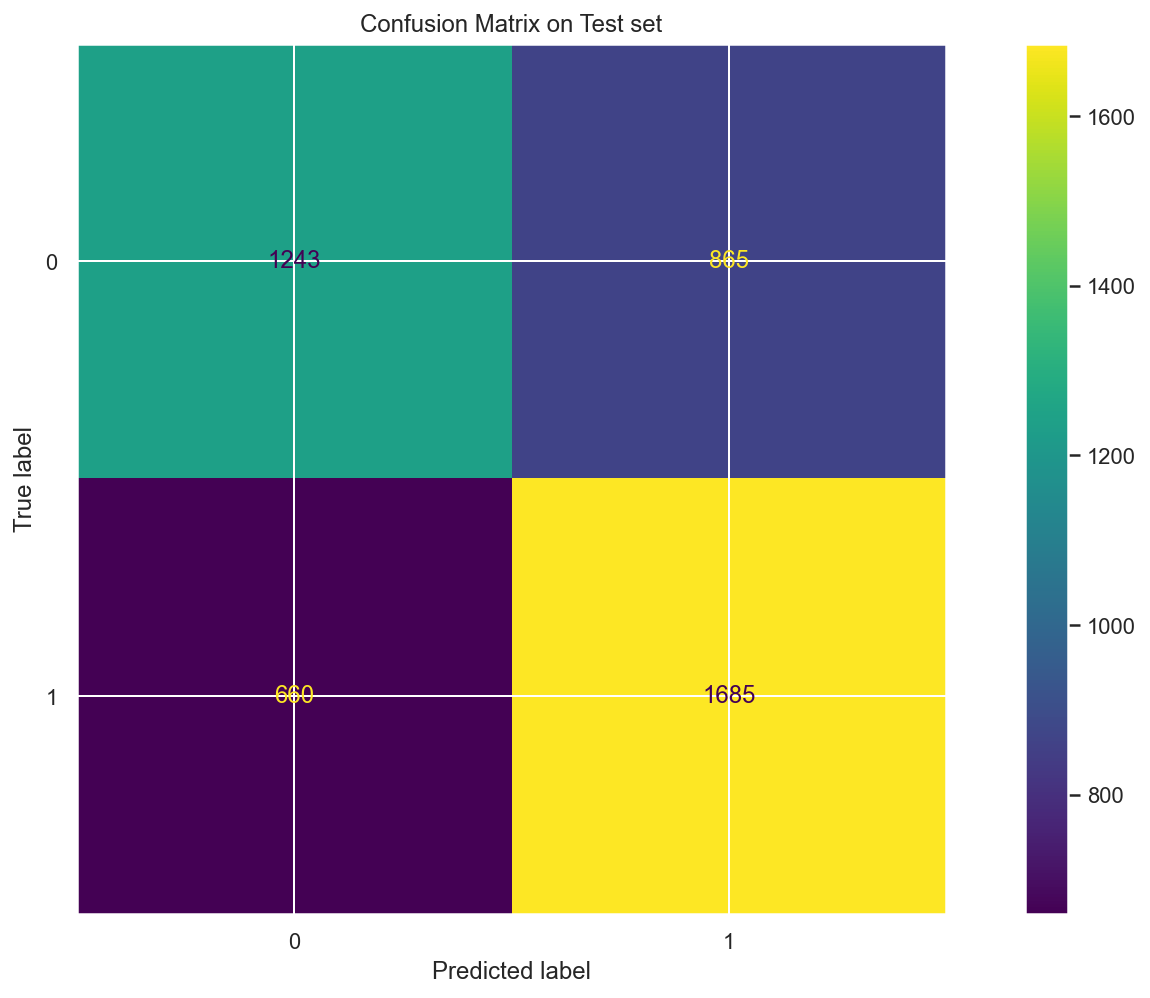

In [84]:
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn

plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn

plt.show()

## Classification report

In [85]:
print(classification_report(y_train, pred_train))

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.66      0.58      0.61      6346
           1       0.65      0.73      0.69      7010

    accuracy                           0.66     13356
   macro avg       0.66      0.65      0.65     13356
weighted avg       0.66      0.66      0.65     13356

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      2108
           1       0.66      0.72      0.69      2345

    accuracy                           0.66      4453
   macro avg       0.66      0.65      0.65      4453
weighted avg       0.66      0.66      0.66      4453



## ROC CURVE

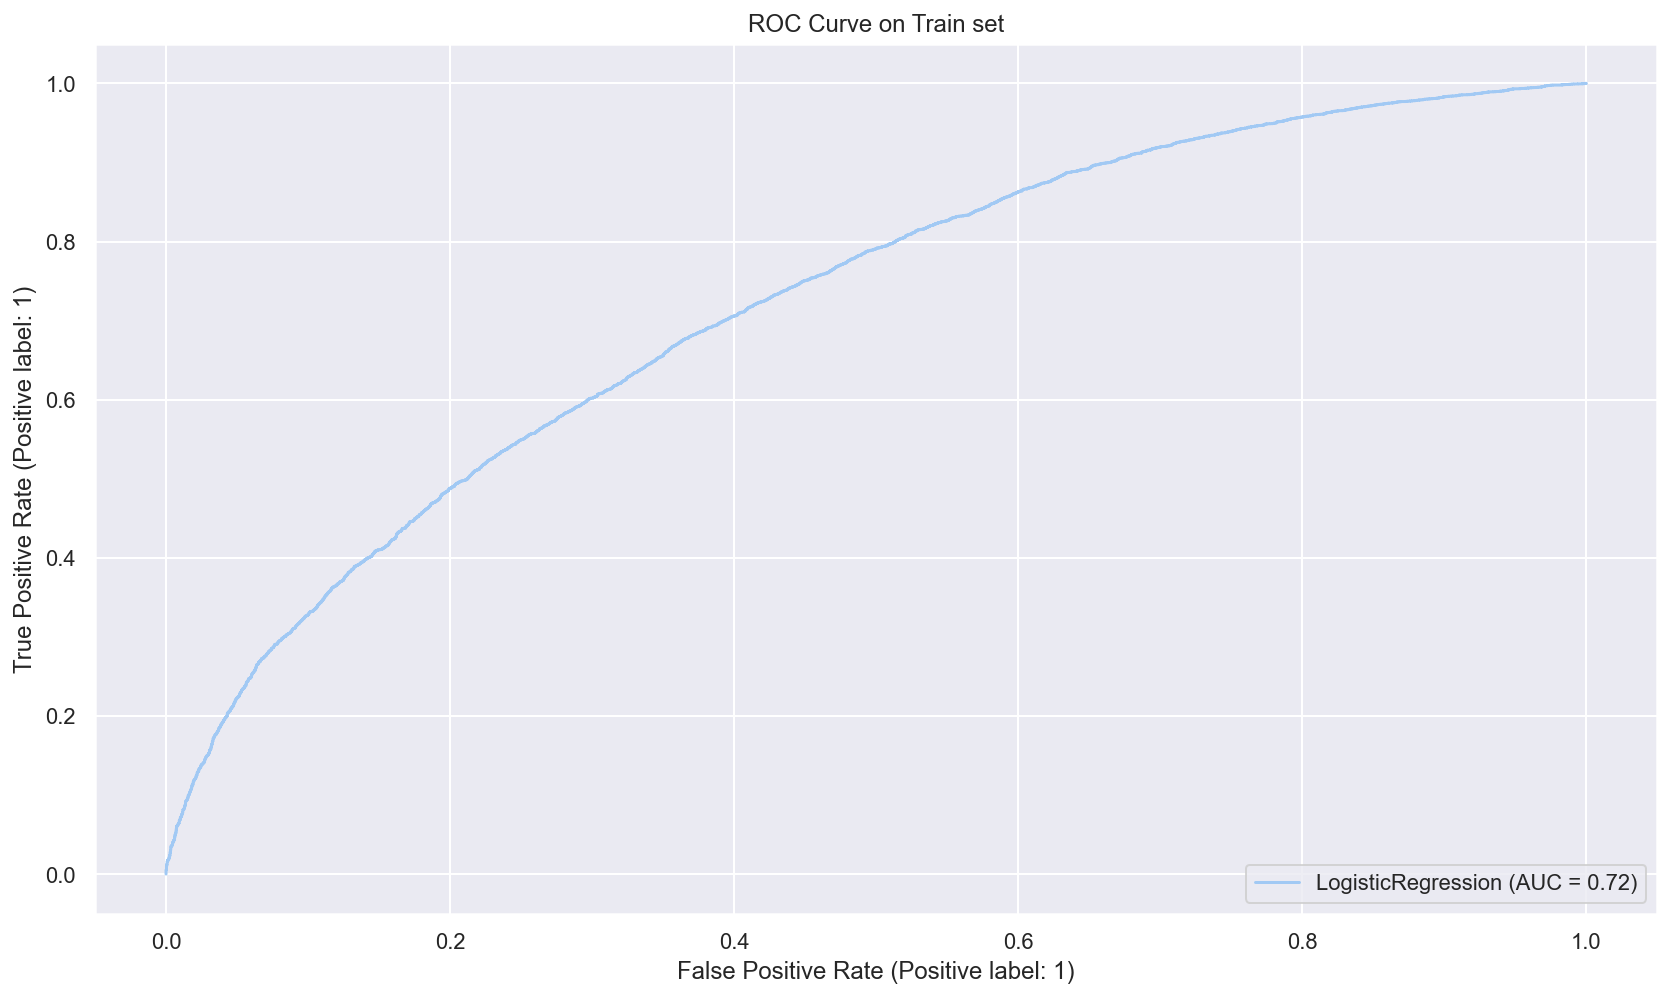

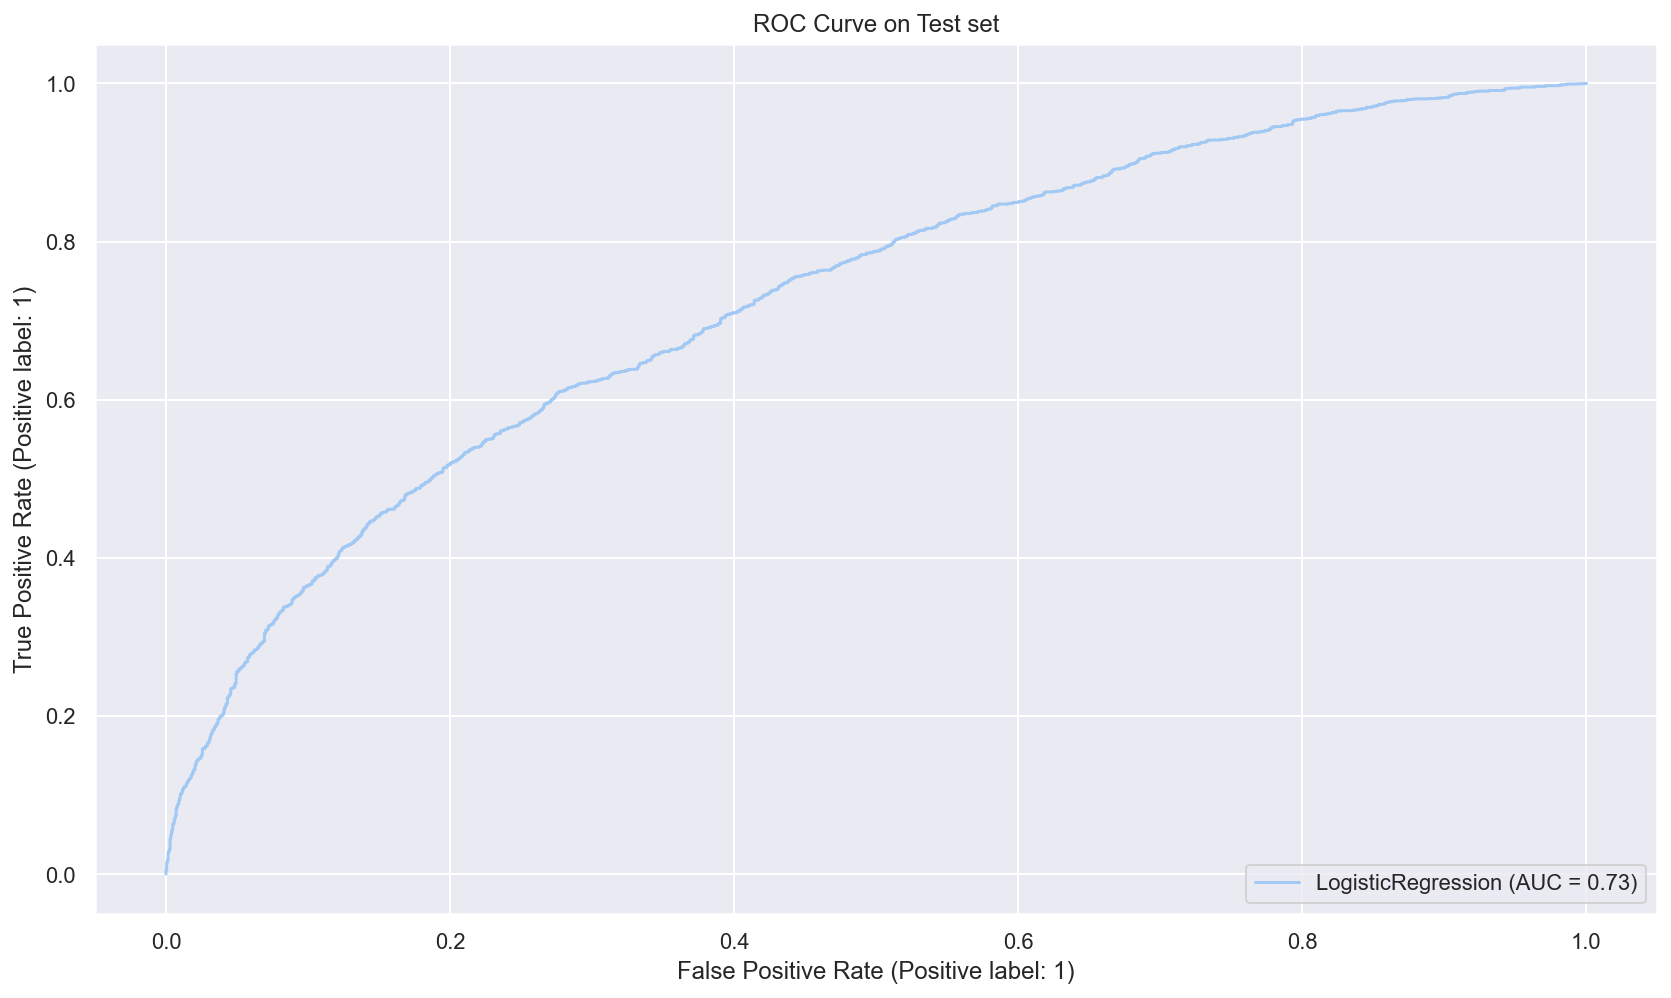

In [86]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn
#plt.savefig("ROC_TRAin", bbox_inches='tight')
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn
#plt.savefig("ROC_TEST", bbox_inches='tight')
plt.show()